<a href="https://colab.research.google.com/github/AndersonGabrielCalasans/Projeto-Final-Engenharia-de-Dados-SoulCode/blob/main/Tratamento_SP_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 👮‍♀️ **Tratamento dos Data Frames de São Paulo com Pandas**

Link para a documentação completa do projeto: [clique aqui](https://www.notion.so/Mindful-Data-Consultoria-d495964059c34acb9c8fe3d21dbb5cf6)



## **📚 1 - Instalação e importação das bibliotecas**

In [1]:
# Instaladores 

# Google Cloud Storage
%%capture
%pip install gcsfs

# Conector MySQL
%pip install mysql-connector-python
%pip install PyMySQL

# Apache Beam (cada um executado individualmente e reiniciado o kernel)
#pip install --upgrade pip
#pip install apache_beam[interactive]
#pip install apache_beam[gcp]

In [7]:
# Conexão do Storage
from google.cloud import storage

# Importa sistema operacional
import os

# Conector do MySQL
from mysql.connector import Error
from sqlalchemy import create_engine

# Pandas
import pandas as pd

# Numpy
import numpy as np

# Matplotlib
import matplotlib.pyplot as plt

# MongoClient
from pymongo import MongoClient

# Apache Beam
import apache_beam as beam

# setando configurações de display do pandas
pd.set_option('display.max_columns',100)

## 🔗 **2 - Conexão com o DataLake**

In [8]:
# Configuração da chave de segurança
serviceAccount = '/content/chave-projeto-final.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

# Fazer acesso ao bucket do Cloud Storage
client = storage.Client()

# Criar uma variável para receber o nome do bucket
bucket = client.get_bucket('projeto_final_soulcode')

## ⚒️ **3 - Extração das bases de dados**

In [9]:
# Criando variavel com endereço dos arquivos
path1 = 'gs://projeto_final_soulcode/Arquivos-PreTratados/sp_homicidios_orig.xlsx'
path2 = 'gs://projeto_final_soulcode/Arquivos-PreTratados/sp_latrocinio_orig.xlsx'
path3 = 'gs://projeto_final_soulcode/Arquivos-PreTratados/sp_lesao_orig.xlsx'
path4 = 'gs://projeto_final_soulcode/Arquivos-PreTratados/sp_policia_orig.xlsx'

In [10]:
# Gerando Data Frames
dfsp_hom = pd.read_excel(path1)
dfsp_lat = pd.read_excel(path2)
dfsp_les = pd.read_excel(path3)
dfsp_pol = pd.read_excel(path4)

In [11]:
# Fazendo Back Up dos dados
dfsp_hom_bk = dfsp_hom.copy()
dfsp_lat_bk = dfsp_lat.copy()
dfsp_les_bk = dfsp_les.copy()
dfsp_pol_bk = dfsp_pol.copy()

## 🔨**4 - Padronização dos DF's**

### ☑️ **Dados de homicidios dolosos**

In [12]:
# Visualizando dados
dfsp_hom.head(1)

,DEPARTAMENTO_CIRCUNSCRICAO,SECCIONAL_CIRCUNSCRICAO,MUNICIPIO_CIRCUNSCRICAO,DP_CIRCUNSCRICAO,HD,Nº DE VÍT HD,ID_DELEGACIA,MÊS ESTATISTICA,ANO ESTATISTICA,DATAHORA_REGISTRO_BO,NUM_BO,ANO_BO,MUNICIPIO_ELABORACAO,DP_ELABORACAO,SEC_ELABORACAO,DEP_ELABORACAO,DATA_FATO,HORA_FATO,DESC_TIPOLOCAL,LOGRADOURO,NUMERO_LOGRADOURO,LATITUDE,LONGITUDE,TIPO_PESSOA,SEXO_PESSOA,IDADE_PESSOA,DATA_NASCIMENTO_PESSOA,COR_PELE,PROFISSAO,NATUREZA_APURADA
0,DECAP,1ª SEC,São Paulo,002 DP - Bom Retiro,1.0,1,200100,1,2018,2018-01-07,16,2018,S.PAULO,DHPP DIV. HOMICIDIOS,DHPP - DEP. HOM. PROTECAO PESSOA,DHPP,2018-01-06,20:06:00,Via pública,AVENIDA PRESIDENTE CASTELO BRANCO,6173,-23.523712,-46.606388,Vítima,Masculino,NaN,NaT,Ignorada,NaN,HOMICÍDIO DOLOSO


In [13]:
# Verificando nome das colunas
dfsp_hom.columns

Index(['DEPARTAMENTO_CIRCUNSCRICAO', 'SECCIONAL_CIRCUNSCRICAO',
       'MUNICIPIO_CIRCUNSCRICAO', 'DP_CIRCUNSCRICAO', 'HD', 'Nº DE VÍT HD',
       'ID_DELEGACIA', 'MÊS ESTATISTICA', 'ANO ESTATISTICA',
       'DATAHORA_REGISTRO_BO', 'NUM_BO', 'ANO_BO', 'MUNICIPIO_ELABORACAO',
       'DP_ELABORACAO', 'SEC_ELABORACAO', 'DEP_ELABORACAO', 'DATA_FATO',
       'HORA_FATO', 'DESC_TIPOLOCAL', 'LOGRADOURO', 'NUMERO_LOGRADOURO',
       'LATITUDE', 'LONGITUDE', 'TIPO_PESSOA', 'SEXO_PESSOA', 'IDADE_PESSOA',
       'DATA_NASCIMENTO_PESSOA', 'COR_PELE', 'PROFISSAO', 'NATUREZA_APURADA'],
      dtype='object')

In [14]:
# Verificando itens diferentes
pd.unique(dfsp_hom['HD'])

array([ 1., nan])

In [15]:
pd.unique(dfsp_hom['Nº DE VÍT HD'])

array([1])

In [16]:
# Realizando drop das colunas
dfsp_hom.drop(labels=['HD',
                      'ID_DELEGACIA',
                      'MUNICIPIO_ELABORACAO',
                      'DP_ELABORACAO',
                      'SEC_ELABORACAO',
                      'DEP_ELABORACAO'], axis=1, inplace = True)

In [17]:
#Renomear as colunas Homicidio
dfsp_hom.rename(columns={
    'DEPARTAMENTO_CIRCUNSCRICAO': 'departamento_circunscricao', 'SECCIONAL_CIRCUNSCRICAO' : 'seccional_circunscricao',
    'MUNICIPIO_CIRCUNSCRICAO': 'cidade', 'DP_CIRCUNSCRICAO ': 'dp_circunscricao','Nº DE VÍT HD': 'n_vitimas',
    'MÊS ESTATISTICA': 'mes_ocorrencia','ANO ESTATISTICA': 'ano_ocorrencia','DATAHORA_REGISTRO_BO': 'datahora_bo',
    'NUM_BO': 'num_bo','ANO_BO': 'ano_bo','DATA_FATO': 'dt_fato','HORA_FATO': 'hora_fato','DESC_TIPOLOCAL':'tipo_local_fato',
    'LOGRADOURO': 'logradouro','NUMERO_LOGRADOURO': 'n_logradouro','LATITUDE': 'latitude','LONGITUDE': 'longitude',
    'TIPO_PESSOA':'tipo_pessoa','SEXO_PESSOA': 'sexo_pessoa','IDADE_PESSOA': 'idade_pessoa','DATA_NASCIMENTO_PESSOA': 'dt_nasc_pessoa',
    'COR_PELE': 'cor_pele','PROFISSAO':'profissao','NATUREZA_APURADA': 'tipo_crime'},inplace=True)



In [18]:
dfsp_hom.columns

Index(['departamento_circunscricao', 'seccional_circunscricao', 'cidade',
       'DP_CIRCUNSCRICAO', 'n_vitimas', 'mes_ocorrencia', 'ano_ocorrencia',
       'datahora_bo', 'num_bo', 'ano_bo', 'dt_fato', 'hora_fato',
       'tipo_local_fato', 'logradouro', 'n_logradouro', 'latitude',
       'longitude', 'tipo_pessoa', 'sexo_pessoa', 'idade_pessoa',
       'dt_nasc_pessoa', 'cor_pele', 'profissao', 'tipo_crime'],
      dtype='object')

### ☑️ **Dados de latrocinio**

In [19]:
# Visualizando dados
dfsp_lat.head(1)

,DEPARTAMENTO_CIRCUNSCRICAO,SECCIONAL_CIRCUNSCRICAO,MUNICIPIO_CIRCUNSCRICAO,DP_CIRCUNSCRICAO,LATRO,Nº DE VIT EM LATRO,ID_DELEGACIA,MÊS ESTATISTICA,ANO ESTATISTICA,DATAHORA_REGISTRO_BO,NUM_BO,ANO_BO,MUNICIPIO_ELABORACAO,DP_ELABORACAO,SEC_ELABORACAO,DEP_ELABORACAO,DATA_FATO,HORA_FATO,DESC_TIPOLOCAL,LOGRADOURO,NUMERO_LOGRADOURO,LATITUDE,LONGITUDE,TIPO_PESSOA,SEXO_PESSOA,IDADE_PESSOA,DATA_NASCIMENTO_PESSOA,COR_PELE,PROFISSAO,NATUREZA_APURADA
0,DECAP,1ª SEC,São Paulo,005 DP - Aclimação,1.0,1,10342,1,2018,2018-01-21,550,2018,S.PAULO,78º D.P. JARDINS,DEL.SEC.1º CENTRO,DECAP,2018-01-21,00:02:00,Via pública,AVENIDA BRIGADEIRO LUIS ANTONIO,1572.0,-23.562435,-46.645048,Vítima,Masculino,59.0,1958-02-18,Branca,JORNALISTA,LATROCÍNIO


In [20]:
# Verificando nome das colunas
dfsp_lat.columns

Index(['DEPARTAMENTO_CIRCUNSCRICAO', 'SECCIONAL_CIRCUNSCRICAO',
       'MUNICIPIO_CIRCUNSCRICAO', 'DP_CIRCUNSCRICAO', 'LATRO',
       'Nº DE VIT EM LATRO', 'ID_DELEGACIA', 'MÊS ESTATISTICA',
       'ANO ESTATISTICA', 'DATAHORA_REGISTRO_BO', 'NUM_BO', 'ANO_BO',
       'MUNICIPIO_ELABORACAO', 'DP_ELABORACAO', 'SEC_ELABORACAO',
       'DEP_ELABORACAO', 'DATA_FATO', 'HORA_FATO', 'DESC_TIPOLOCAL',
       'LOGRADOURO', 'NUMERO_LOGRADOURO', 'LATITUDE', 'LONGITUDE',
       'TIPO_PESSOA', 'SEXO_PESSOA', 'IDADE_PESSOA', 'DATA_NASCIMENTO_PESSOA',
       'COR_PELE', 'PROFISSAO', 'NATUREZA_APURADA'],
      dtype='object')

In [21]:
# Verificando itens diferentes
pd.unique(dfsp_lat['LATRO'])

array([ 1., nan,  0.])

In [22]:
pd.unique(dfsp_lat['Nº DE VIT EM LATRO'])

array([1])

In [23]:
# Realizando drop das colunas
dfsp_lat.drop(labels=['LATRO',
                      'ID_DELEGACIA',
                      'MUNICIPIO_ELABORACAO',
                      'DP_ELABORACAO',
                      'SEC_ELABORACAO',
                      'DEP_ELABORACAO'], axis=1, inplace = True)

In [24]:
#Renomear as colunas lATROCINIO
dfsp_lat.rename(columns={
    'DEPARTAMENTO_CIRCUNSCRICAO': 'departamento_circunscricao', 'SECCIONAL_CIRCUNSCRICAO' : 'seccional_circunscricao',
    'MUNICIPIO_CIRCUNSCRICAO': 'cidade', 'DP_CIRCUNSCRICAO ': 'dp_circunscricao','Nº DE VIT EM LATRO': 'n_vitimas',
    'MÊS ESTATISTICA': 'mes_ocorrencia','ANO ESTATISTICA': 'ano_ocorrencia','DATAHORA_REGISTRO_BO': 'datahora_bo',
    'NUM_BO': 'num_bo','ANO_BO': 'ano_bo','DATA_FATO': 'dt_fato','HORA_FATO': 'hora_fato','DESC_TIPOLOCAL':'tipo_local_fato',
    'LOGRADOURO': 'logradouro','NUMERO_LOGRADOURO': 'n_logradouro','LATITUDE': 'latitude','LONGITUDE': 'longitude',
    'TIPO_PESSOA':'tipo_pessoa','SEXO_PESSOA': 'sexo_pessoa','IDADE_PESSOA': 'idade_pessoa','DATA_NASCIMENTO_PESSOA': 'dt_nasc_pessoa',
    'COR_PELE': 'cor_pele','PROFISSAO':'profissao','NATUREZA_APURADA': 'tipo_crime'},inplace=True)

In [25]:
# Verificando alterações
dfsp_lat.columns

Index(['departamento_circunscricao', 'seccional_circunscricao', 'cidade',
       'DP_CIRCUNSCRICAO', 'n_vitimas', 'mes_ocorrencia', 'ano_ocorrencia',
       'datahora_bo', 'num_bo', 'ano_bo', 'dt_fato', 'hora_fato',
       'tipo_local_fato', 'logradouro', 'n_logradouro', 'latitude',
       'longitude', 'tipo_pessoa', 'sexo_pessoa', 'idade_pessoa',
       'dt_nasc_pessoa', 'cor_pele', 'profissao', 'tipo_crime'],
      dtype='object')

### ☑️ **Dados de Lesão corporal seguida de morte**

In [26]:
# Visualizando dados
dfsp_les.head(1)

,DEPARTAMENTO_CIRCUNSCRICAO,SECCIONAL_CIRCUNSCRICAO,MUNICIPIO_CIRCUNSCRICAO,DP_CIRCUNSCRICAO,LCSM,Unnamed: 5,ID_DELEGACIA,MÊS ESTATISTICA,ANO ESTATISTICA,DATAHORA_REGISTRO_BO,NUM_BO,ANO_BO,MUNICIPIO_ELABORACAO,DP_ELABORACAO,SEC_ELABORACAO,DEP_ELABORACAO,DATA_FATO,HORA_FATO,DESC_TIPOLOCAL,LOGRADOURO,NUMERO_LOGRADOURO,LATITUDE,LONGITUDE,TIPO_PESSOA,SEXO_PESSOA,IDADE_PESSOA,DATA_NASCIMENTO_PESSOA,COR_PELE,PROFISSAO,NATUREZA_APURADA
0,DECAP,5ª SEC,São Paulo,056 DP - Vila Alpina,1,NaN,10310,1,2017,2017-01-05 00:00:00,74,2017,S.PAULO,56º D.P. VILA ALPINA,DEL.SEC.5º LESTE,DECAP,2017-01-05 00:00:00,08:10:00,Saúde,AVENIDA FRANCISCO FALCONI,1501,NaN,NaN,Vítima,Feminino,32,1984-12-06 00:00:00,Parda,VENDEDOR(A),LESÃO CORPORAL SEGUIDA DE MORTE


In [27]:
# Verificando nome das colunas
dfsp_les.columns

Index(['DEPARTAMENTO_CIRCUNSCRICAO', 'SECCIONAL_CIRCUNSCRICAO',
       'MUNICIPIO_CIRCUNSCRICAO', 'DP_CIRCUNSCRICAO', 'LCSM', 'Unnamed: 5',
       'ID_DELEGACIA', 'MÊS ESTATISTICA', 'ANO ESTATISTICA',
       'DATAHORA_REGISTRO_BO', 'NUM_BO', 'ANO_BO', 'MUNICIPIO_ELABORACAO',
       'DP_ELABORACAO', 'SEC_ELABORACAO', 'DEP_ELABORACAO', 'DATA_FATO',
       'HORA_FATO', 'DESC_TIPOLOCAL', 'LOGRADOURO', 'NUMERO_LOGRADOURO',
       'LATITUDE', 'LONGITUDE', 'TIPO_PESSOA', 'SEXO_PESSOA', 'IDADE_PESSOA',
       'DATA_NASCIMENTO_PESSOA', 'COR_PELE', 'PROFISSAO', 'NATUREZA_APURADA'],
      dtype='object')

In [28]:
# Verificando dados das colunas
pd.unique(dfsp_les['LCSM'])

array([1])

In [29]:
# Realizando drop das colunas
dfsp_les.drop(labels=['LCSM',
                      'ID_DELEGACIA',
                      'MUNICIPIO_ELABORACAO',
                      'DP_ELABORACAO',
                      'SEC_ELABORACAO',
                      'DEP_ELABORACAO'], axis=1, inplace = True)

In [30]:
# verificando se foi dropada
dfsp_les.columns

Index(['DEPARTAMENTO_CIRCUNSCRICAO', 'SECCIONAL_CIRCUNSCRICAO',
       'MUNICIPIO_CIRCUNSCRICAO', 'DP_CIRCUNSCRICAO', 'Unnamed: 5',
       'MÊS ESTATISTICA', 'ANO ESTATISTICA', 'DATAHORA_REGISTRO_BO', 'NUM_BO',
       'ANO_BO', 'DATA_FATO', 'HORA_FATO', 'DESC_TIPOLOCAL', 'LOGRADOURO',
       'NUMERO_LOGRADOURO', 'LATITUDE', 'LONGITUDE', 'TIPO_PESSOA',
       'SEXO_PESSOA', 'IDADE_PESSOA', 'DATA_NASCIMENTO_PESSOA', 'COR_PELE',
       'PROFISSAO', 'NATUREZA_APURADA'],
      dtype='object')

In [31]:
# Renomeando colunas
dfsp_les.rename(columns={'DEPARTAMENTO_CIRCUNSCRICAO': 'departamento_circunscricao',
                         'SECCIONAL_CIRCUNSCRICAO' : 'seccional_circunscricao',
                         'MUNICIPIO_CIRCUNSCRICAO': 'cidade', 
                         'DP_CIRCUNSCRICAO': 'dp_circunscricao',
                         'Unnamed: 5': 'n_vitimas',
                         'MÊS ESTATISTICA': 'mes_ocorrencia',
                         'ANO ESTATISTICA': 'ano_ocorrencia',
                         'DATAHORA_REGISTRO_BO': 'datahora_bo',
                         'NUM_BO': 'num_bo',
                         'ANO_BO': 'ano_bo',
                         'DATA_FATO': 'dt_fato',
                         'HORA_FATO': 'hora_fato',
                         'DESC_TIPOLOCAL':'tipo_local_fato',
                         'LOGRADOURO': 'logradouro',
                         'NUMERO_LOGRADOURO': 'n_logradouro',
                         'LATITUDE': 'latitude',
                         'LONGITUDE': 'longitude',
                         'TIPO_PESSOA':'tipo_pessoa',
                         'SEXO_PESSOA': 'sexo_pessoa',
                         'IDADE_PESSOA': 'idade_pessoa',
                         'DATA_NASCIMENTO_PESSOA': 'dt_nasc_pessoa',
                         'COR_PELE': 'cor_pele',
                         'PROFISSAO':'profissao',
                         'NATUREZA_APURADA': 'tipo_crime'
                         
}, inplace = True)

In [32]:
# verificando se foi dropada
dfsp_les.columns

Index(['departamento_circunscricao', 'seccional_circunscricao', 'cidade',
       'dp_circunscricao', 'n_vitimas', 'mes_ocorrencia', 'ano_ocorrencia',
       'datahora_bo', 'num_bo', 'ano_bo', 'dt_fato', 'hora_fato',
       'tipo_local_fato', 'logradouro', 'n_logradouro', 'latitude',
       'longitude', 'tipo_pessoa', 'sexo_pessoa', 'idade_pessoa',
       'dt_nasc_pessoa', 'cor_pele', 'profissao', 'tipo_crime'],
      dtype='object')

### ☑️ **Dados de morte decorrente de intervenção policial**

In [33]:
# Verificando Data Frame
dfsp_pol.head(5)

,DEPARTAMENTO_CIRCUNSCRICAO,SECCIONAL_CIRCUNSCRICAO,MUNICIPIO_CIRCUNSCRICAO,DP_CIRCUNSCRICAO,COORPORAÇÃO,SITUAÇÃO,ID_DELEGACIA,MÊS ESTATISTICA,ANO ESTATISTICA,DATAHORA_REGISTRO_BO,NUM_BO,ANO_BO,MUNICIPIO_ELABORACAO,DP_ELABORACAO,SEC_ELABORACAO,DEP_ELABORACAO,DATA_FATO,HORA_FATO,DESC_TIPOLOCAL,LOGRADOURO,NUMERO_LOGRADOURO,LATITUDE,LONGITUDE,TIPO_PESSOA,SEXO_PESSOA,IDADE_PESSOA,DATA_NASCIMENTO_PESSOA,COR_PELE,PROFISSAO,NATUREZA_APURADA
0,DEMACRO,DEL.SEC.TABOÃO DA SERRA,ITAPECERICA DA SERRA,DEL.POL.ITAPECERICA DA SERRA,PM,folga,30406,1,2017,2017-01-01 00:00:00,1,2017,ITAPECERICA DA SERRA,DEL.POL.ITAPECERICA DA SERRA,DEL.SEC.TABOÃO DA SERRA,DEMACRO,2017-01-01 00:00:00,01:00:00,Via pública,RUA JULIO MANOEL DE ARAUJO,218,-23.703543,-46.80364,Autor/Vitima,Masculino,27,1989-01-07 00:00:00,Parda,GUARDA MUNICIPAL,MORTE DECORRENTE DE INTERVENÇÃO POLICIAL
1,DEMACRO,DEL.SEC.SANTO ANDRÉ,S.ANDRE,06º D.P. SANTO ANDRÉ,PM,serviço,30105,1,2017,2017-01-01 00:00:00,15,2017,S.ANDRE,04º D.P. SANTO ANDRÉ,DEL.SEC.SANTO ANDRÉ,DEMACRO,2017-01-01 00:00:00,16:00:00,Area não ocupada,RUA SAGUI DA SERRA,861,-23.741765,-46.475464,Autor/Vitima,Masculino,27,1989-05-08 00:00:00,Branca,NaN,MORTE DECORRENTE DE INTERVENÇÃO POLICIAL
2,DEINTER 1 - SAO JOSE DOS CAMPOS,DEL.SEC.S.SEBASTIAO,UBATUBA,DEL.POL.UBATUBA,PM,serviço,40304,1,2017,2017-01-03 00:00:00,64,2017,UBATUBA,DEL.POL.UBATUBA,DEL.SEC.S.SEBASTIAO,DEINTER 1 - SAO JOSE DOS CAMPOS,2017-01-02 00:00:00,22:00:00,Via pública,RUA CRAVOS,0,-23.43665,-45.088326,Autor/Vitima,Masculino,NaN,NaN,Branca,NaN,MORTE DECORRENTE DE INTERVENÇÃO POLICIAL
3,DEINTER 9 - PIRACICABA,DEL.SEC.RIO CLARO,RIO CLARO,01º D.P. RIO CLARO,PM,serviço,70924,1,2017,2017-01-03 00:00:00,88,2017,RIO CLARO,DEL.SEC.RIO CLARO PLANTÃO,DEL.SEC.RIO CLARO,DEINTER 9 - PIRACICABA,2017-01-02 00:00:00,23:55:00,Via pública,RUA 17,0,-22.415139,-47.555497,Vítima,Masculino,22,1994-01-24 00:00:00,Branca,DESEMPREGADO(A),MORTE DECORRENTE DE INTERVENÇÃO POLICIAL
4,DECAP,DEL.SEC.2º SUL,S.PAULO,97º D.P. AMERICANOPOLIS,PM,serviço,200100,1,2017,2017-01-04 00:00:00,8,2017,S.PAULO,DHPP DIV. HOMICIDIOS,DHPP - DEP. HOM. PROTECAO PESSOA,DHPP,2017-01-03 00:00:00,22:55:00,Residência,DA VEDAÇÃO DA DIVULGAÇÃO DOS DADOS RELATIVOS,NaN,NaN,NaN,Autor/Vitima,Masculino,NaN,NaN,Parda,NaN,MORTE DECORRENTE DE INTERVENÇÃO POLICIAL


In [34]:
sorted(pd.unique(dfsp_pol['MUNICIPIO_CIRCUNSCRICAO']))

['AGUAI',
 'AGUAS DE S. BARBARA',
 'AGUDOS',
 'ALTAIR',
 'ALVARES MACHADO',
 'ALVINLÂNDIA',
 'AMERICANA',
 'ARACARIGUAMA',
 'ARACATUBA',
 'ARAPEI',
 'ARARAQUARA',
 'ARARAS',
 'ARIRANHA',
 'ARTUR NOGUEIRA',
 'ARUJA',
 'ASSIS',
 'ATIBAIA',
 'AVARE',
 'BADY BASSIT',
 'BARRA BONITA',
 'BARRETOS',
 'BARRINHA',
 'BARUERI',
 'BASTOS',
 'BATATAIS',
 'BAURU',
 'BEBEDOURO',
 'BERTIOGA',
 'BIRITIBA-MIRIM',
 'BOFETE',
 'BOITUVA',
 'BOM JESUS DOS PERDOES',
 'BOTUCATU',
 'BRAGANCA PAULISTA',
 'BURITAMA',
 'CABRÁLIA PAULISTA',
 'CACAPAVA',
 'CAFELANDIA',
 'CAIEIRAS',
 'CAJAMAR',
 'CAJATI',
 'CAMPINAS',
 'CAMPO LIMPO PAULISTA',
 'CAMPOS DO JORDAO',
 'CAMPOS NOVOS PAUL.',
 'CANANEIA',
 'CANDIDO MOTA',
 'CAPELA DO ALTO',
 'CAPIVARI',
 'CARAGUATATUBA',
 'CARAPICUIBA',
 'CASA BRANCA',
 'CATANDUVA',
 'CATIGUA',
 'CEDRAL',
 'CERQUILHO',
 'CHARQUEADA',
 'CONCHAL',
 'CORONEL MACEDO',
 'CORUMBATAI',
 'COSMOPOLIS',
 'COTIA',
 'CRIME MILITAR',
 'CRUZEIRO',
 'CUBATAO',
 'DESCALVADO',
 'DIADEMA',
 'ELDORADO',
 'EL

In [35]:
# Verificando colunas
dfsp_pol.columns

Index(['DEPARTAMENTO_CIRCUNSCRICAO', 'SECCIONAL_CIRCUNSCRICAO',
       'MUNICIPIO_CIRCUNSCRICAO', 'DP_CIRCUNSCRICAO', 'COORPORAÇÃO',
       'SITUAÇÃO', 'ID_DELEGACIA', 'MÊS ESTATISTICA', 'ANO ESTATISTICA',
       'DATAHORA_REGISTRO_BO', 'NUM_BO', 'ANO_BO', 'MUNICIPIO_ELABORACAO',
       'DP_ELABORACAO', 'SEC_ELABORACAO', 'DEP_ELABORACAO', 'DATA_FATO',
       'HORA_FATO', 'DESC_TIPOLOCAL', 'LOGRADOURO', 'NUMERO_LOGRADOURO',
       'LATITUDE', 'LONGITUDE', 'TIPO_PESSOA', 'SEXO_PESSOA', 'IDADE_PESSOA',
       'DATA_NASCIMENTO_PESSOA', 'COR_PELE', 'PROFISSAO', 'NATUREZA_APURADA'],
      dtype='object')

In [36]:
# Realizando drop das colunas
dfsp_pol.drop(labels=['ID_DELEGACIA',
                      'MUNICIPIO_ELABORACAO',
                      'DP_ELABORACAO',
                      'SEC_ELABORACAO',
                      'DEP_ELABORACAO'], axis=1, inplace = True)

In [37]:
# Verificando modificação
dfsp_pol.columns

Index(['DEPARTAMENTO_CIRCUNSCRICAO', 'SECCIONAL_CIRCUNSCRICAO',
       'MUNICIPIO_CIRCUNSCRICAO', 'DP_CIRCUNSCRICAO', 'COORPORAÇÃO',
       'SITUAÇÃO', 'MÊS ESTATISTICA', 'ANO ESTATISTICA',
       'DATAHORA_REGISTRO_BO', 'NUM_BO', 'ANO_BO', 'DATA_FATO', 'HORA_FATO',
       'DESC_TIPOLOCAL', 'LOGRADOURO', 'NUMERO_LOGRADOURO', 'LATITUDE',
       'LONGITUDE', 'TIPO_PESSOA', 'SEXO_PESSOA', 'IDADE_PESSOA',
       'DATA_NASCIMENTO_PESSOA', 'COR_PELE', 'PROFISSAO', 'NATUREZA_APURADA'],
      dtype='object')

In [38]:
# Renomeando colunas
dfsp_pol.rename(columns={'DEPARTAMENTO_CIRCUNSCRICAO': 'departamento_circunscricao',
                         'SECCIONAL_CIRCUNSCRICAO' : 'seccional_circunscricao',
                         'MUNICIPIO_CIRCUNSCRICAO': 'cidade', 
                         'DP_CIRCUNSCRICAO ': 'dp_circunscricao',
                         'MÊS ESTATISTICA': 'mes_ocorrencia',
                         'ANO ESTATISTICA': 'ano_ocorrencia',
                         'DATAHORA_REGISTRO_BO': 'datahora_bo',
                         'NUM_BO': 'num_bo',
                         'ANO_BO': 'ano_bo',
                         'DATA_FATO': 'dt_fato',
                         'HORA_FATO': 'hora_fato',
                         'DESC_TIPOLOCAL':'tipo_local_fato',
                         'LOGRADOURO': 'logradouro',
                         'NUMERO_LOGRADOURO': 'n_logradouro',
                         'LATITUDE': 'latitude',
                         'LONGITUDE': 'longitude',
                         'TIPO_PESSOA':'tipo_pessoa',
                         'SEXO_PESSOA': 'sexo_pessoa',
                         'IDADE_PESSOA': 'idade_pessoa',
                         'DATA_NASCIMENTO_PESSOA': 'dt_nasc_pessoa',
                         'COR_PELE': 'cor_pele',
                         'PROFISSAO':'profissao',
                         'NATUREZA_APURADA': 'tipo_crime',
                         'COORPORAÇÃO':'corporacao_policial',
                         'SITUAÇÃO':'situacao_policial'
                         
}, inplace = True)

In [39]:
# Verificando modificação
dfsp_pol.columns

Index(['departamento_circunscricao', 'seccional_circunscricao', 'cidade',
       'DP_CIRCUNSCRICAO', 'corporacao_policial', 'situacao_policial',
       'mes_ocorrencia', 'ano_ocorrencia', 'datahora_bo', 'num_bo', 'ano_bo',
       'dt_fato', 'hora_fato', 'tipo_local_fato', 'logradouro', 'n_logradouro',
       'latitude', 'longitude', 'tipo_pessoa', 'sexo_pessoa', 'idade_pessoa',
       'dt_nasc_pessoa', 'cor_pele', 'profissao', 'tipo_crime'],
      dtype='object')

In [40]:
#Renomeando Cidade
dfsp_pol.replace({'S.PAULO': 'São Paulo'}, inplace=True)

In [41]:
#Renomeando DPs
dfsp_pol.replace({'01º D.P. SE':'001 DP - Sé','03º D.P. CAMPOS ELISEOS':'003 DP - Campos Elíseos',
                   '04º D.P. CONSOLAÇÃO':'004 DP - Consolação','05º D.P., ACLIMACAO':'005 DP - Aclimação','06º D.P. CAMBUCI':'006 DP - Cambuci',
                   '07º D.P. LAPA':'007 DP - Lapa','08º D.P. BRAS':'008 DP - Brás', '09º D.P. - CARANDIRU':'009 DP - Carandiru',
                   '100º D.P. JDIM HERCULANO':'100 DP - Jardim Herculano','101º D.P. JDIM IMBUIAS':'101 DP - Jardim das Imbuias',
                   '102º D.P. SOCORRO':'102 DP - Socorro','103º D.P. COHABII/ITAQU.':'103 DP - Cohab Itaquera',
                   '10º D.P. PENHA DE FRANCA':'010 DP - Penha de França','11º D.P. SANTO AMARO':'011 DP - Santo Amaro',
                   '12º D.P. PARI':'012 DP - Pari','13º D.P. CASA VERDE':'013 DP - Casa Verde',
                   '14º D.P. PINHEIROS':'014 DP - Pinheiros','15ª DP DR LUCIANO H BEIGUELMAN':'015 DP - Itaim Bibi','15º D.P. DR. LUC. H BEIGUELMAN':'015 DP - Itaim Bibi',
                   '16º D.P. VILA CLEMENTINO':'016 DP - Vila Clementino','17º D.P. DOUTOR ALDO GALIANO':'017 DP - Ipiranga','18º D.P. ALTO DA MOOCA':'018 DP - Alto da Mooca',
                   '19º D.P. VILA MARIA':'019 DP - Vila Maria','20º D.P. AGUA FRIA':'020 DP - Água Fria',
                   '21º D.P. VILA MATILDE':'021 DP - Vila Matilde','22º D.P. SAO MIGUEL PTA':'022 DP - São Miguel Paulista',
                   '23º D.P. PERDIZES':'023 DP - Perdizes','24º D.P. PONTE RASA':'024 DP - Ponte Rasa',
                   '25º D.P. PARELHEIROS':'025 DP - Parelheiros','26º D.P. SACOMA':'026 DP - Sacomã',
                   '27º DP "DR. IGNÁCIO FRANCISCO"':'027 DP - Campo Belo','28º D.P. FREGUESIA DO O':'028 DP - Freguesia do Ó', 
                   '29º D.P. VILA PRUDENTE':'029 DP - Vila Diva','30º D.P. TATUAPE':'030 DP - Tatuapé','31º D.P. VILA CARRAO':'031 DP - Vila Carrão',
                   '32º D.P. ITAQUERA':'032 DP - Itaquera','33º D.P. PIRITUBA':'033 DP - Pirituba', '34º D.P. MORUMBI':'034 DP - Vila Sonia',
                   '35º D.P. JABAQUARA':'035 DP - Jabaquara','36º D.P. VILA MARIANA':'036 DP - Vila Mariana',
                   '37º D.P. CAMPO LIMPO':'037 DP - Campo Limpo','38º D.P. VILA AMALIA':'038 DP - Vila Amália',
                   '39º D.P. VILA GUSTAVO':'039 DP - Vila Gustavo','40º D.P. VILA STA MARIA':'040 DP - Vila Santa Maria',
                   '41º D.P. VILA RICA':'041 DP - Vila Rica','42º D.P. PARQUE S. LUCAS':'042 DP - Parque São Lucas',
                   '43º D.P. CIDADE ADEMAR':'043 DP - Cidade Ademar','44º D.P. GUAIANAZES':'044 DP - Guaianazes',
                   '45º D.P. V BRASILANDIA':'045 DP - Vila Brasilândia','46º D.P. PERUS':'046 DP - Perus',
                   '47º D.P. CAPAO REDONDO':'047 DP - Capão Redondo','48º D.P. CIDADE DUTRA':'048 DP - Cidade Dutra',
                   '49º D.P. SAO MATEUS':'049 DP - São Mateus', '50º D.P. ITAIM PAULISTA':'050 DP - Itaim Paulista',
                   '51º D.P. RIO PEQUENO':'051 DP - Butantã', '52º D.P. PARQUE S.JORGE':'052 DP - Parque São Jorge',
                   '53º D.P. PARQUE DO CARMO':'053 DP - Parque do Carmo','54º D.P. CID. TIRADENTES':'054 DP - Cidade Tiradentes',
                   '55º D.P. PARQUE S.RAFAEL':'055 DP - Parque São Rafael','56º D.P. VILA ALPINA':'056 DP - Vila Alpina',
                   '57º D.P. PARQUE DA MOOCA':'057 DP - Parque da Mooca','58º D.P. VILA FORMOSA':'058 DP - Vila Formosa',
                   '59º D.P. JARDIM DOS IPES':'059 DP - Jardim Noemia','62º D.P. ERMELINO MATARAZZO':'062 DP - Ermelino Matarazzo',
                   '63º D.P. VILA JACUI':'063 DP - Vila Jacuí','64º D.P. CID.AE CARVALHO':'064 DP - Cidade A E Carvalho',
                   '65º D.P. ARTUR ALVIM':'065 DP - Artur Alvim','66º D.P. JDIM ARICANDUVA':'066 DP - Vale do Aricanduva',
                   '67º D.P. JARDIM ROBRU':'067 DP - Jardim Robru','68º D.P. LAGEADO':'068 DP - Lajeado',
                   '69 D.P. - TEOTONIO VILELA':'069 DP - Teotônio Vilela','69º D.P. TEOTONIO VILELA':'069 DP - Teotônio Vilela', 
                   '70º D.P. VILA EMA':'070 DP - Vila Ema','72º D.P. VILA PENTEADO':'072 DP - Vila Penteado',
                   '73º D.P. JACANA':'073 DP - Jaçanã','74º D.P. PARADA TAIPAS':'074 DP - Jaraguá',
                   '75º D.P. JARDIM ARPOADOR':'075 DP - Jardim Arpoador','77º D.P. SANTA CECILIA':'077 DP - Santa Cecília',
                   '78º D.P. JARDINS':'078 DP - Jardins','80º D.P. VILA JOANIZA':'080 DP - Vila Joaniza',
                   '83º D.P. PARQUE BRISTOL':'083 DP - Parque Bristol','85º D.P. JARDIM MIRNA':'085 DP - Jardim Mirna',
                   '87º D.P. V. P. BARRETO':'087 DP - Vila Pereira Barreto','89º D.P. JARDIM TABOAO':'089 DP - Portal do Morumbi',
                   '90º D.P. PQ. NOVO MUNDO':'090 DP - Parque Novo Mundo','91º D.P. CEASA':'091 DP - Ceagesp',
                   '92º D.P. PQ. SANTO ANTONIO':'092 DP - Parque Santo Antônio','93º D.P. JAGUARÉ':'093 DP - Jaguaré',
                   '95º D.P. HELIÓPOLIS':'095 DP - Heliópolis','96º D.P. MONÇÕES':'096 DP - Monções',
                   '97º D.P. AMERICANOPOLIS':'097 DP - Americanópolis','98º D.P. JARDIM MIRIAM':'098 DP - Jardim Míriam',
                   '99º D.P. CAMPO GRANDE': '099 DP - Campo Grande'}, inplace=True)

##📒 **5 - Concatenação dos arquivos e filtrando por cidade São Paulo**

In [44]:
# concat dos dados
dfsp_geral = pd.concat([dfsp_hom, dfsp_lat, dfsp_les,dfsp_pol])

In [45]:
# Verificando strings unicas em cidade
sorted(dfsp_geral['cidade'].unique())

['8ª SEC',
 'AGUAI',
 'AGUAS DE S. BARBARA',
 'AGUDOS',
 'ALTAIR',
 'ALVARES MACHADO',
 'ALVINLÂNDIA',
 'AMERICANA',
 'ARACARIGUAMA',
 'ARACATUBA',
 'ARAPEI',
 'ARARAQUARA',
 'ARARAS',
 'ARIRANHA',
 'ARTUR NOGUEIRA',
 'ARUJA',
 'ASSIS',
 'ATIBAIA',
 'AVARE',
 'Adamantina',
 'Aguaí',
 'Agudos',
 'Alambari',
 'Altair',
 'Altinópolis',
 'Alumínio',
 'Alvinlândia',
 'Americana',
 'Amparo',
 'Américo Brasiliense',
 'Américo de Campos',
 'Analândia',
 'Andradina',
 'Angatuba',
 'Anhembi',
 'Aparecida',
 'Apiaí',
 'Aramina',
 'Arandu',
 'Araraquara',
 'Araras',
 'Araçariguama',
 'Araçatuba',
 'Araçoiaba da Serra',
 'Arealva',
 'Areias',
 'Areiópolis',
 'Artur Nogueira',
 'Arujá',
 'Aspásia',
 'Assis',
 'Atibaia',
 'Auriflama',
 'Avanhandava',
 'Avaré',
 'BADY BASSIT',
 'BARRA BONITA',
 'BARRETOS',
 'BARRINHA',
 'BARUERI',
 'BASTOS',
 'BATATAIS',
 'BAURU',
 'BEBEDOURO',
 'BERTIOGA',
 'BIRITIBA-MIRIM',
 'BOFETE',
 'BOITUVA',
 'BOM JESUS DOS PERDOES',
 'BOTUCATU',
 'BRAGANCA PAULISTA',
 'BURITAM

In [46]:
# Contando o número de ocorrências
dfsp_geral.groupby(['cidade']).size().sort_values(ascending=False)

cidade
São Paulo         4673
Campinas           560
Guarulhos          350
Sorocaba           216
Ribeirão Preto     212
                  ... 
Pontes Gestal        1
Sales Oliveira       1
ITAPEVA              1
ITAI                 1
Sagres               1
Length: 805, dtype: int64

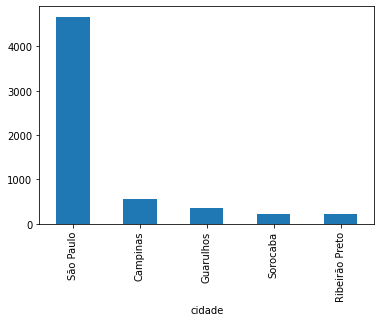

In [47]:
# Mostrando as 5 campeãs em ocorrências no estado de São Paulo
dfsp_geral.groupby(['cidade']).size().sort_values(ascending=False).head(5).plot.bar()

In [48]:
# Filtrando por cidade = São Paulo
ft = dfsp_geral['cidade'] == 'São Paulo'
dfsp_geral = dfsp_geral.loc[ft]

In [49]:
# Drop das ocorrências de 2017
ft2018 = dfsp_geral['ano_ocorrencia'] == 2018
ft2019 = dfsp_geral['ano_ocorrencia'] == 2019
ft2020 = dfsp_geral['ano_ocorrencia'] == 2020
ft2021 = dfsp_geral['ano_ocorrencia'] == 2021

dfsp_geral = dfsp_geral.loc[ft2018 | ft2019 | ft2020 | ft2021]

In [50]:
# Verificando alteração
dfsp_geral.shape

(4273, 27)

In [51]:
# Verificando index
dfsp_geral.loc[0]

,departamento_circunscricao,seccional_circunscricao,cidade,DP_CIRCUNSCRICAO,n_vitimas,mes_ocorrencia,ano_ocorrencia,datahora_bo,num_bo,ano_bo,dt_fato,hora_fato,tipo_local_fato,logradouro,n_logradouro,latitude,longitude,tipo_pessoa,sexo_pessoa,idade_pessoa,dt_nasc_pessoa,cor_pele,profissao,tipo_crime,dp_circunscricao,corporacao_policial,situacao_policial
0,DECAP,1ª SEC,São Paulo,002 DP - Bom Retiro,1.0,1,2018,2018-01-07 00:00:00,16,2018,2018-01-06 00:00:00,20:06:00,Via pública,AVENIDA PRESIDENTE CASTELO BRANCO,6173,-23.523712,-46.606388,Vítima,Masculino,NaN,NaT,Ignorada,NaN,HOMICÍDIO DOLOSO,NaN,NaN,NaN
0,DECAP,1ª SEC,São Paulo,005 DP - Aclimação,1.0,1,2018,2018-01-21 00:00:00,550,2018,2018-01-21 00:00:00,00:02:00,Via pública,AVENIDA BRIGADEIRO LUIS ANTONIO,1572.0,-23.562435,-46.645048,Vítima,Masculino,59.0,1958-02-18 00:00:00,Branca,JORNALISTA,LATROCÍNIO,NaN,NaN,NaN


In [52]:
# Resetando o index
dfsp_geral = dfsp_geral.reset_index()

In [53]:
# Verificando se foi corrigido
dfsp_geral.tail(3)

,index,departamento_circunscricao,seccional_circunscricao,cidade,DP_CIRCUNSCRICAO,n_vitimas,mes_ocorrencia,ano_ocorrencia,datahora_bo,num_bo,ano_bo,dt_fato,hora_fato,tipo_local_fato,logradouro,n_logradouro,latitude,longitude,tipo_pessoa,sexo_pessoa,idade_pessoa,dt_nasc_pessoa,cor_pele,profissao,tipo_crime,dp_circunscricao,corporacao_policial,situacao_policial
4270,4038,DECAP,DHPP - DEP. HOM. PROTECAO PESSOA,São Paulo,069 DP - Teotônio Vilela,NaN,12,2021,2021-12-29 00:00:00,481,2021,2021-12-29 00:00:00,12:45:00,Residência,DA VEDAÇÃO DA DIVULGAÇÃO DOS DADOS RELATIVOS,NaN,NaN,NaN,Autor/Vitima,Masculino,NaN,NaN,Parda,NaN,MORTE DECORRENTE DE INTERVENÇÃO POLICIAL,NaN,PM,serviço
4271,4039,DECAP,DEL.SEC.1º CENTRO,São Paulo,003 DP - Campos Elíseos,NaN,12,2021,2021-12-30 00:00:00,483,2021,2021-12-29 00:00:00,23:45:00,Hospedagem,RUA GENERAL OSORIO,413,-23.537508,-46.64165,Autor/Vitima,Masculino,NaN,NaN,Branca,NaN,MORTE DECORRENTE DE INTERVENÇÃO POLICIAL,NaN,PM,serviço
4272,4041,DECAP,DEL.SEC.8º SAO MATEUS,São Paulo,041 DP - Vila Rica,NaN,12,2021,2021-12-30 00:00:00,7059,2021,2021-12-29 00:00:00,22:52:00,Via pública,AVENIDA RIO DAS PEDRAS,655,-23.569583,-46.508261,Autor/Vitima,Masculino,27,1994-03-16 00:00:00,Parda,NaN,MORTE DECORRENTE DE INTERVENÇÃO POLICIAL,NaN,PM,serviço


In [54]:
# Verificando as colunas
dfsp_geral.columns

Index(['index', 'departamento_circunscricao', 'seccional_circunscricao',
       'cidade', 'DP_CIRCUNSCRICAO', 'n_vitimas', 'mes_ocorrencia',
       'ano_ocorrencia', 'datahora_bo', 'num_bo', 'ano_bo', 'dt_fato',
       'hora_fato', 'tipo_local_fato', 'logradouro', 'n_logradouro',
       'latitude', 'longitude', 'tipo_pessoa', 'sexo_pessoa', 'idade_pessoa',
       'dt_nasc_pessoa', 'cor_pele', 'profissao', 'tipo_crime',
       'dp_circunscricao', 'corporacao_policial', 'situacao_policial'],
      dtype='object')

In [55]:
# Dropando coluna com o index antigo
dfsp_geral.drop(['index'], axis=1, inplace= True)

# Verificando colunas pós drop
dfsp_geral.columns

Index(['departamento_circunscricao', 'seccional_circunscricao', 'cidade',
       'DP_CIRCUNSCRICAO', 'n_vitimas', 'mes_ocorrencia', 'ano_ocorrencia',
       'datahora_bo', 'num_bo', 'ano_bo', 'dt_fato', 'hora_fato',
       'tipo_local_fato', 'logradouro', 'n_logradouro', 'latitude',
       'longitude', 'tipo_pessoa', 'sexo_pessoa', 'idade_pessoa',
       'dt_nasc_pessoa', 'cor_pele', 'profissao', 'tipo_crime',
       'dp_circunscricao', 'corporacao_policial', 'situacao_policial'],
      dtype='object')

In [56]:
# Criando backup do Data Frame
dfsp_geral_bk = dfsp_geral.copy()

# Plot dos dados
dfsp_geral.head(3)

,departamento_circunscricao,seccional_circunscricao,cidade,DP_CIRCUNSCRICAO,n_vitimas,mes_ocorrencia,ano_ocorrencia,datahora_bo,num_bo,ano_bo,dt_fato,hora_fato,tipo_local_fato,logradouro,n_logradouro,latitude,longitude,tipo_pessoa,sexo_pessoa,idade_pessoa,dt_nasc_pessoa,cor_pele,profissao,tipo_crime,dp_circunscricao,corporacao_policial,situacao_policial
0,DECAP,1ª SEC,São Paulo,002 DP - Bom Retiro,1.0,1,2018,2018-01-07 00:00:00,16,2018,2018-01-06 00:00:00,20:06:00,Via pública,AVENIDA PRESIDENTE CASTELO BRANCO,6173,-23.523712,-46.606388,Vítima,Masculino,NaN,NaT,Ignorada,NaN,HOMICÍDIO DOLOSO,NaN,NaN,NaN
1,DECAP,1ª SEC,São Paulo,002 DP - Bom Retiro,1.0,1,2018,2018-01-06 00:00:00,106,2018,2018-01-06 00:00:00,19:00:00,Residência,DA VEDAÇÃO DA DIVULGAÇÃO DOS DADOS RELATIVOS,NaN,NaN,NaN,Vítima,Masculino,44.0,1973-06-06 00:00:00,Branca,CABELEIREIRO(A),HOMICÍDIO DOLOSO,NaN,NaN,NaN
2,DECAP,1ª SEC,São Paulo,008 DP - Brás,1.0,1,2018,2018-01-18 00:00:00,370,2018,2018-01-18 00:00:00,18:00:00,Comércio e serviços,RUA DA MOOCA,820,-23.5539,-46.617413,Vítima,Feminino,59.0,1958-08-02 00:00:00,Parda,COMERCIANTE,HOMICÍDIO DOLOSO,NaN,NaN,NaN


##📝 **6 - Tratando inconsistências no Data Frame Geral**

In [57]:
# Criando backup do Data Frame
dfsp_geral = dfsp_geral_bk.copy()

###▶️ **Verificando inconsistências nos dados por colunas**

 Encontramos no data frame, seguindo os passos mostrados abaixo, as seguintes inconsistências:
 - ano_ocorrencia tem 2017 (só trabalharemos com 2018 a 2021)
 - datahora_bo também possui 2017
 - num_bo - dropar (dados sem padrão e sem relecancia)
 - ano_bo - tem 2017 e 'SEM RESPOSTA DA DELEGACIA. CASO MANTIDO' normalizar para data ou tratar como null
 - linha 247 dropar (dado irrelevante e linha toda faltante
 - hora_fato possui strings A NOITE', 'A TARDE', 'DE MADRUGADA', 'EM HORA INCERTA', 'PELA MANHÃ', 'PELA MANHÃ          ', 'RDO NÃO LOCALIZADO', será gerada uma nova coluna a partir dela com (manha (06:00 as 11:59), tarde (12:00 as 17:59), noite (18:00 as 23:54) e madrugada (00:00 as 05:59))
 - dp_circunscricao: corrigir **003 DP - Campos Elíseos**(certo) 003 DP - Campos Elísios(errado)
 - dp_circunscricao (pode ser criada uma tabela com o nome da DP representando o bairro da ocorrencia)
 - tipo_local_fato: Palavras escritas de formas diferentes:
 Via pública, Via Pública, VIA PÚBLICA, Via pública...
 - Remover espaços em branco no começo e final das colunas que forem strings
 - n_logradouro com muita inconcistência (não será útil, dropar)
 - tipo_pessoa - Palavras escritas de forma diferente: Vítima, vítima e 'Vítima              '
 - coluna situacao_policial fazer replace de serviço e Serviço
 - Verificar se ano_nasc_pessoa bate com data_nasc_pessoa

In [58]:
# Pegando o nome das colunas
dfsp_geral.columns

Index(['departamento_circunscricao', 'seccional_circunscricao', 'cidade',
       'DP_CIRCUNSCRICAO', 'n_vitimas', 'mes_ocorrencia', 'ano_ocorrencia',
       'datahora_bo', 'num_bo', 'ano_bo', 'dt_fato', 'hora_fato',
       'tipo_local_fato', 'logradouro', 'n_logradouro', 'latitude',
       'longitude', 'tipo_pessoa', 'sexo_pessoa', 'idade_pessoa',
       'dt_nasc_pessoa', 'cor_pele', 'profissao', 'tipo_crime',
       'dp_circunscricao', 'corporacao_policial', 'situacao_policial'],
      dtype='object')

In [59]:
# Filtros de análise

# ft = dfsp_geral['tipo_pessoa'] == 'Autor/Vítima'
# ft2 = dfsp_geral['dp_circunscricao'] == '077 DP - Santa Cecília'
# dfsp_geral.loc[ft]

In [60]:
# Filtros por coluna

# dfsp_geral.groupby(dfsp_geral['dt_fato']).size().sort_values()
dfsp_geral['dt_fato'].unique()
# sorted(dfsp_geral['dt_fato'].unique())

array([Timestamp('2018-01-06 00:00:00'), Timestamp('2018-01-18 00:00:00'),
       Timestamp('2018-01-02 00:00:00'), ...,
       datetime.datetime(2021, 12, 10, 0, 0),
       datetime.datetime(2021, 12, 11, 0, 0),
       datetime.datetime(2021, 12, 16, 0, 0)], dtype=object)

###▶️ **Realizando drop de colunas e linhas irrelevantes**

In [61]:
# Plot do Data Frame
dfsp_geral.head(1)

,departamento_circunscricao,seccional_circunscricao,cidade,DP_CIRCUNSCRICAO,n_vitimas,mes_ocorrencia,ano_ocorrencia,datahora_bo,num_bo,ano_bo,dt_fato,hora_fato,tipo_local_fato,logradouro,n_logradouro,latitude,longitude,tipo_pessoa,sexo_pessoa,idade_pessoa,dt_nasc_pessoa,cor_pele,profissao,tipo_crime,dp_circunscricao,corporacao_policial,situacao_policial
0,DECAP,1ª SEC,São Paulo,002 DP - Bom Retiro,1.0,1,2018,2018-01-07 00:00:00,16,2018,2018-01-06 00:00:00,20:06:00,Via pública,AVENIDA PRESIDENTE CASTELO BRANCO,6173,-23.523712,-46.606388,Vítima,Masculino,NaN,NaT,Ignorada,NaN,HOMICÍDIO DOLOSO,NaN,NaN,NaN


In [62]:
# drop de colunas que não serão usadas
dfsp_geral.drop(columns=['departamento_circunscricao',
                         'seccional_circunscricao',
                         'mes_ocorrencia','ano_ocorrencia',
                         'datahora_bo','num_bo', 'ano_bo'], axis = 1, inplace= True)

In [63]:
# Plot do Data Frame pós alteração
dfsp_geral.head(1)

,cidade,DP_CIRCUNSCRICAO,n_vitimas,dt_fato,hora_fato,tipo_local_fato,logradouro,n_logradouro,latitude,longitude,tipo_pessoa,sexo_pessoa,idade_pessoa,dt_nasc_pessoa,cor_pele,profissao,tipo_crime,dp_circunscricao,corporacao_policial,situacao_policial
0,São Paulo,002 DP - Bom Retiro,1.0,2018-01-06 00:00:00,20:06:00,Via pública,AVENIDA PRESIDENTE CASTELO BRANCO,6173,-23.523712,-46.606388,Vítima,Masculino,NaN,NaT,Ignorada,NaN,HOMICÍDIO DOLOSO,NaN,NaN,NaN


In [64]:
# Filtrando por linha inconsistente
dfsp_geral.loc[dfsp_geral['dt_fato'] == 'RDO NÃO LOCALIZADO']

,cidade,DP_CIRCUNSCRICAO,n_vitimas,dt_fato,hora_fato,tipo_local_fato,logradouro,n_logradouro,latitude,longitude,tipo_pessoa,sexo_pessoa,idade_pessoa,dt_nasc_pessoa,cor_pele,profissao,tipo_crime,dp_circunscricao,corporacao_policial,situacao_policial
3009,São Paulo,NaN,NaN,RDO NÃO LOCALIZADO,RDO NÃO LOCALIZADO,RDO NÃO LOCALIZADO,RDO NÃO LOCALIZADO,RDO NÃO LOCALIZADO,RDO NÃO LOCALIZADO,RDO NÃO LOCALIZADO,RDO NÃO LOCALIZADO,RDO NÃO LOCALIZADO,RDO NÃO LOCALIZADO,RDO NÃO LOCALIZADO,RDO NÃO LOCALIZADO,RDO NÃO LOCALIZADO,LESÃO CORPORAL SEGUIDA DE MORTE,081 DP - Belém,NaN,NaN


In [65]:
# Drop da linha inconsistente
dfsp_geral.drop(labels=3009, axis = 0, inplace = True)

# Verificando se foi removido
dfsp_geral.loc[dfsp_geral['dt_fato'] == 'RDO NÃO LOCALIZADO']

,cidade,DP_CIRCUNSCRICAO,n_vitimas,dt_fato,hora_fato,tipo_local_fato,logradouro,n_logradouro,latitude,longitude,tipo_pessoa,sexo_pessoa,idade_pessoa,dt_nasc_pessoa,cor_pele,profissao,tipo_crime,dp_circunscricao,corporacao_policial,situacao_policial


###▶️ **Retirando espaços em branco (strip)**

In [66]:
# Verificando tipo das colunas 
dfsp_geral.columns

Index(['cidade', 'DP_CIRCUNSCRICAO', 'n_vitimas', 'dt_fato', 'hora_fato',
       'tipo_local_fato', 'logradouro', 'n_logradouro', 'latitude',
       'longitude', 'tipo_pessoa', 'sexo_pessoa', 'idade_pessoa',
       'dt_nasc_pessoa', 'cor_pele', 'profissao', 'tipo_crime',
       'dp_circunscricao', 'corporacao_policial', 'situacao_policial'],
      dtype='object')

In [67]:
# Criando lista de strings
colunas = ['cidade','dp_circunscricao','tipo_local_fato','logradouro','n_logradouro',
           'tipo_pessoa','sexo_pessoa', 'cor_pele','profissao','tipo_crime',
           'corporacao_policial','situacao_policial']

In [68]:
# Fazendo strip das colunas
for x in colunas:
  dfsp_geral[x] = dfsp_geral[x].str.strip()

###▶️ **Corrigindo linhas nulas e duplicadas**

In [69]:
# Verificando total de linhas
dfsp_geral.shape

(4272, 20)

In [70]:
dfsp_geral.isna().sum()

cidade                    0
DP_CIRCUNSCRICAO         84
n_vitimas              1304
dt_fato                   0
hora_fato                 0
tipo_local_fato           1
logradouro                0
n_logradouro           4271
latitude                872
longitude               873
tipo_pessoa               0
sexo_pessoa               0
idade_pessoa            914
dt_nasc_pessoa          993
cor_pele                  0
profissao              1878
tipo_crime                0
dp_circunscricao       4188
corporacao_policial    3052
situacao_policial      3052
dtype: int64

In [71]:
#Verificando a quantidade de duplicados
dfsp_geral.duplicated().sum() 

72

In [72]:
#Deletar linhas duplicadas
dfsp_geral.drop_duplicates(keep=False,inplace=True)

In [73]:
# Conferindo se foi corrigido
dfsp_geral.duplicated().sum() 

0

###▶️ **Corrigindo idade_pessoa**

In [74]:
# Filtrando por linha inconsistente, Verificado todas as datas de nascimento e a unica que nao bate o nascimento com a idade é essa
dfsp_geral.loc[dfsp_geral['idade_pessoa'] == 118]

,cidade,DP_CIRCUNSCRICAO,n_vitimas,dt_fato,hora_fato,tipo_local_fato,logradouro,n_logradouro,latitude,longitude,tipo_pessoa,sexo_pessoa,idade_pessoa,dt_nasc_pessoa,cor_pele,profissao,tipo_crime,dp_circunscricao,corporacao_policial,situacao_policial
2745,São Paulo,075 DP - Jardim Arpoador,1.0,2018-05-27 00:00:00,18:08:00,Via pública,RUA ORESTES COLOMBARI,NaN,-23.5886,-46.7694,Vítima,Masculino,118.0,1966-07-03 00:00:00,Parda,APOSENTADO(A),LATROCÍNIO,NaN,NaN,NaN


In [75]:
#Corrigir idade_pessoa de 118 para 52 (2018-1966)
dfsp_geral.idade_pessoa.replace('118','52',inplace=True)

###▶️ **Corrigindo a coluna Tipo_pessoa**

In [76]:
dfsp_geral['tipo_pessoa'].unique()

array(['Vítima', 'Autor/Vitima', 'Adolescente Inf/Vit', 'Adolescente',
       'vítima', 'Encontro de Cadáver', 'Partes', 'Indiciado',
       'Desaparecido', 'Investigado', 'Adolescente infrator', 'Autor'],
      dtype=object)

In [77]:
#Corrigir palavra"Vítima'
dfsp_geral.tipo_pessoa.replace('vítima','Vítima',inplace=True)
dfsp_geral.tipo_pessoa.replace('Adolescente','Adolescente infrator',inplace=True)
dfsp_geral.tipo_pessoa.replace('Autor/Vitima','Autor/Vítima',inplace=True)

In [78]:
dfsp_geral['tipo_pessoa'].unique()

array(['Vítima', 'Autor/Vítima', 'Adolescente Inf/Vit',
       'Adolescente infrator', 'Encontro de Cadáver', 'Partes',
       'Indiciado', 'Desaparecido', 'Investigado', 'Autor'], dtype=object)

###▶️ **Normalizando o dado Via Publica na coluna tipo_local_fato**

In [79]:
dfsp_geral['tipo_local_fato'].unique()

array(['Via pública', 'Residência', 'Comércio e serviços', 'Saúde',
       'Area não ocupada', 'Condominio Comercial', 'Restaurante e afins',
       'Hospedagem', 'Lazer e recreação', 'Repartição Pública',
       'Centro Comerc./Empresarial', 'Serviços e bens públicos',
       'Condominio Residencial', 'Terminal/Estação',
       'Local clandestino/ilegal', 'Favela', 'Entidade assistencial',
       'Rodovia/Estrada', 'Unidade rural', 'Templo e afins',
       'Estabelecimento de ensino', 'Escritório',
       'Estabelecimento prisional', nan, 'Carro Forte', 'Shopping Center',
       'Via Pública', 'VIA PÚBLICA', 'Estabelecimento industrial',
       'Estabelecimento bancário'], dtype=object)

In [80]:
#Corrigir palavra 'Via Publica'
dfsp_geral.tipo_local_fato.replace('VIA PÚBLICA','Via Pública',inplace=True)
dfsp_geral.tipo_local_fato.replace('Via pública','Via Pública',inplace=True)

In [81]:
dfsp_geral['tipo_local_fato'].unique()

array(['Via Pública', 'Residência', 'Comércio e serviços', 'Saúde',
       'Area não ocupada', 'Condominio Comercial', 'Restaurante e afins',
       'Hospedagem', 'Lazer e recreação', 'Repartição Pública',
       'Centro Comerc./Empresarial', 'Serviços e bens públicos',
       'Condominio Residencial', 'Terminal/Estação',
       'Local clandestino/ilegal', 'Favela', 'Entidade assistencial',
       'Rodovia/Estrada', 'Unidade rural', 'Templo e afins',
       'Estabelecimento de ensino', 'Escritório',
       'Estabelecimento prisional', nan, 'Carro Forte', 'Shopping Center',
       'Estabelecimento industrial', 'Estabelecimento bancário'],
      dtype=object)

###▶️ **Normalizando Coluna dp_circunscrição**

In [82]:
dfsp_geral['dp_circunscricao'].unique()

array([nan, '046 DP - Perus', '006 DP - Cambuci',
       '089 DP - Portal do Morumbi', '037 DP - Campo Limpo',
       '064 DP - Cidade A E Carvalho', '099 DP - Campo Grande',
       '103 DP - Cohab Itaquera', '091 DP - Ceagesp',
       '028 DP - Freguesia do Ó', '034 DP - Vila Sonia',
       '077 DP - Santa Cecília', '005 DP - Aclimação', '102 DP - Socorro',
       '019 DP - Vila Maria', '047 DP - Capão Redondo',
       '032 DP - Itaquera', '001 DP - Sé', '033 DP - Pirituba',
       '054 DP - Cidade Tiradentes', '008 DP - Brás',
       '040 DP - Vila Santa Maria', '045 DP - Vila Brasilândia',
       '072 DP - Vila Penteado', '062 DP - Ermelino Matarazzo',
       '085 DP - Jardim Mirna', '069 DP - Teotônio Vilela',
       '014 DP - Pinheiros', '013 DP - Casa Verde',
       '025 DP - Parelheiros', '011 DP - Santo Amaro',
       '100 DP - Jardim Herculano', '035 DP - Jabaquara',
       '080 DP - Vila Joaniza', '063 DP - Vila Jacuí', '068 DP - Lajeado',
       '043 DP - Cidade Ademar', '02

In [83]:
#Corrigir palavra"003 DP - Campos Elíseos'
dfsp_geral.dp_circunscricao.replace('003 DP - Campos Elísios','003 DP - Campos Elíseos',inplace=True)
dfsp_geral.dp_circunscricao.replace('02º D.P. BOM RETIRO','002 DP - Bom Retiro',inplace=True)
dfsp_geral.dp_circunscricao.replace('05º D.P. ACLIMACAO','005 DP - Aclimação',inplace=True)
dfsp_geral.dp_circunscricao.replace('057 DP - Parque da Moóca','057 DP - Parque da Mooca',inplace=True)
dfsp_geral.dp_circunscricao.replace('81º D.P. BELEM','081 DP - Belém',inplace=True)
dfsp_geral.dp_circunscricao.replace('018 DP - Alto da Moóca','018 DP - Alto da Mooca',inplace=True)

In [84]:
#Confirmando
dfsp_geral['dp_circunscricao'].unique()

array([nan, '046 DP - Perus', '006 DP - Cambuci',
       '089 DP - Portal do Morumbi', '037 DP - Campo Limpo',
       '064 DP - Cidade A E Carvalho', '099 DP - Campo Grande',
       '103 DP - Cohab Itaquera', '091 DP - Ceagesp',
       '028 DP - Freguesia do Ó', '034 DP - Vila Sonia',
       '077 DP - Santa Cecília', '005 DP - Aclimação', '102 DP - Socorro',
       '019 DP - Vila Maria', '047 DP - Capão Redondo',
       '032 DP - Itaquera', '001 DP - Sé', '033 DP - Pirituba',
       '054 DP - Cidade Tiradentes', '008 DP - Brás',
       '040 DP - Vila Santa Maria', '045 DP - Vila Brasilândia',
       '072 DP - Vila Penteado', '062 DP - Ermelino Matarazzo',
       '085 DP - Jardim Mirna', '069 DP - Teotônio Vilela',
       '014 DP - Pinheiros', '013 DP - Casa Verde',
       '025 DP - Parelheiros', '011 DP - Santo Amaro',
       '100 DP - Jardim Herculano', '035 DP - Jabaquara',
       '080 DP - Vila Joaniza', '063 DP - Vila Jacuí', '068 DP - Lajeado',
       '043 DP - Cidade Ademar', '02

###▶️ **Normalizando Coluna situacao_policial**

In [85]:
# Verificando dados
dfsp_geral['situacao_policial'].unique()

array([nan, 'serviço', 'folga', 'Serviço'], dtype=object)

In [86]:
# Corrigindo palavra serviço
dfsp_geral.situacao_policial.replace('Serviço','serviço',inplace=True)

In [87]:
# Verificando alteração
dfsp_geral['situacao_policial'].unique()

array([nan, 'serviço', 'folga'], dtype=object)

###▶️ **Verificando a coluna sexo_pessoa e corrigindo**

In [88]:
# Verificando dados
dfsp_geral.groupby(['sexo_pessoa'],dropna=False).size().sort_values(ascending=False)

sexo_pessoa
Masculino     3704
Feminino       403
Indefinido      54
dtype: int64

In [89]:
# Corrigindo palavra
dfsp_geral.sexo_pessoa.replace('masculino','Masculino',inplace=True)

In [90]:
# Verificando correção
dfsp_geral.groupby(['sexo_pessoa'],dropna=False).size().sort_values(ascending=False)

sexo_pessoa
Masculino     3704
Feminino       403
Indefinido      54
dtype: int64

In [91]:
# Padronizando Indefinido para 
dfsp_geral['sexo_pessoa'].replace('Indefinido', 'Desconhecido', inplace=True)

###▶️ **Normalizando dados em cor_pele**

In [92]:
dfsp_geral.groupby(['cor_pele'],dropna=False).size().sort_values(ascending=False)

cor_pele
Parda            2085
Branca           1491
Preta             421
Ignorada          124
Amarela            27
Não informada      10
Vermelha            2
Outros              1
dtype: int64

In [93]:
#Corrigir palavra
dfsp_geral.cor_pele.replace('preta','Preta',inplace=True)
dfsp_geral.cor_pele.replace('Outros','Não informada',inplace=True)
dfsp_geral.cor_pele.replace('Ignorada','Não informada',inplace=True)

In [94]:
dfsp_geral.groupby(['cor_pele'],dropna=False).size().sort_values(ascending=False)

cor_pele
Parda            2085
Branca           1491
Preta             421
Não informada     135
Amarela            27
Vermelha            2
dtype: int64

###▶️ **Verificando profissao**

In [95]:
# dfsp_geral['profissao'].astype(str)
dfsp_geral['profissao'].unique()

array([nan, 'CABELEIREIRO(A)', 'COMERCIANTE', 'APOSENTADO(A)',
       'DESEMPREGADO', 'LAVADOR', 'ESTUDANTE', 'NAO INFORMADA',
       'AJUDANTE', 'DESEMPREGADO(A)', 'RELOJOEIRO(A)', 'PEDREIRO',
       'TECNICO EM ENFERMAGEM', 'FISCAL', 'AUTONOMO(A)',
       'AJUDANTE DE PEDREIRO', 'FUNILEIRO(A)', 'MOTORISTA', 'FRENTISTA',
       'COSTUREIRO(A)', 'VIGILANTE', 'SERVENTE', 'ATENDENTE',
       'AUXILIAR DE FARMACIA', 'GRAFICO(A)', 'BALCONISTA',
       'AJUDANTE DE MOTORISTA', 'ENCARREGADO', 'POLICIAL MILITAR',
       'AGENTE DE SEGURANCA', 'VENDEDOR(A)', 'VENDEDOR(A) AMBULANTE',
       'AUXILIAR DE MECANICO', 'PRENDAS DOMESTICAS',
       'OPERADOR DE MAQUINA', 'DENTISTA', 'AJUDANTE DE ELETRICISTA',
       'ENCANADOR(A)', 'PINTOR DE PAREDES', 'JARDINEIRO(A)',
       'POLIDOR DE VEICULOS', 'AUXILIAR DE ENFERMAGEN', 'ENFERMEIRO(A)',
       'AJUDANTE DE COZINHA', 'PORTEIRO(A)', 'MOTO-BOY', 'PROMOTOR(A)',
       'PINTOR(A)', 'MECANICO(A)', 'MONTADOR(A)', 'SEGURANCA',
       'AJUDANTE DE PINTOR'

In [96]:
#Renomeando Profissoes
dfsp_geral.profissao.replace({'APOSENTADO':'APOSENTADO(A)','APOSENTADO(A':'APOSENTADO(A)',
                            'AUTONOMO': 'AUTONOMO(A)', 'AUTONOMO(A':'AUTONOMO(A)',
                            'DESEMPREGADO': 'DESEMPREGADO(A)', 'DESEMPREGADO(': 'DESEMPREGADO(A)',
                            'DESEMPREGADO(A': 'DESEMPREGADO(A)',
                            'FAXINEIRO(A':'FAXINEIRO(A)', 
                            'JARDINEIRO(A': 'JARDINEIRO(A)',
                            'NAO INFORMADA' : np.nan,
                            'POLICIAL MILITAR - REFORMADO': 'POLICIAL MILITAR REFORMADO',
                            'POLICIAL MILITAR aposentado': 'POLICIAL MILITAR APOSENTADO',
                            'PROFESSOR': 'PROFESSOR(A)', 
                            'REPOSITOR':'REPOSITOR(A)'}, inplace=True)

In [97]:
dfsp_geral.groupby(['profissao'],dropna=False).size().sort_values(ascending=False)

profissao
NaN                        2069
ESTUDANTE                   360
DESEMPREGADO(A)             323
AUTONOMO(A)                 114
COMERCIANTE                  76
                           ... 
GUARDADOR DE CARROS           1
AUXILIAR DE LABORATORIO       1
AUXILIAR DE MANUTENCAO        1
GERENTE COMERCIAL             1
FARMACEUTICO(A)               1
Length: 221, dtype: int64

###▶️ **Replace em Corporacao**

In [98]:
dfsp_geral.groupby(['corporacao_policial'],dropna=False).size().sort_values(ascending=False)

corporacao_policial
NaN    2996
PM     1116
PC       49
dtype: int64

In [99]:
#Corrigir palavra
dfsp_geral.corporacao_policial.replace('PM','Polícia Militar',inplace=True)
dfsp_geral.corporacao_policial.replace('PC','Polícia Civil',inplace=True)

In [100]:
dfsp_geral

,cidade,DP_CIRCUNSCRICAO,n_vitimas,dt_fato,hora_fato,tipo_local_fato,logradouro,n_logradouro,latitude,longitude,tipo_pessoa,sexo_pessoa,idade_pessoa,dt_nasc_pessoa,cor_pele,profissao,tipo_crime,dp_circunscricao,corporacao_policial,situacao_policial
0,São Paulo,002 DP - Bom Retiro,1.0,2018-01-06 00:00:00,20:06:00,Via Pública,AVENIDA PRESIDENTE CASTELO BRANCO,NaN,-23.523712,-46.606388,Vítima,Masculino,NaN,NaT,Não informada,NaN,HOMICÍDIO DOLOSO,NaN,NaN,NaN
1,São Paulo,002 DP - Bom Retiro,1.0,2018-01-06 00:00:00,19:00:00,Residência,DA VEDAÇÃO DA DIVULGAÇÃO DOS DADOS RELATIVOS,NaN,NaN,NaN,Vítima,Masculino,44.0,1973-06-06 00:00:00,Branca,CABELEIREIRO(A),HOMICÍDIO DOLOSO,NaN,NaN,NaN
2,São Paulo,008 DP - Brás,1.0,2018-01-18 00:00:00,18:00:00,Comércio e serviços,RUA DA MOOCA,NaN,-23.5539,-46.617413,Vítima,Feminino,59.0,1958-08-02 00:00:00,Parda,COMERCIANTE,HOMICÍDIO DOLOSO,NaN,NaN,NaN
3,São Paulo,078 DP - Jardins,1.0,2018-01-02 00:00:00,18:48:00,Residência,DA VEDAÇÃO DA DIVULGAÇÃO DOS DADOS RELATIVOS,NaN,NaN,NaN,Vítima,Feminino,0.0,2017-09-16 00:00:00,Branca,NaN,HOMICÍDIO DOLOSO,NaN,NaN,NaN
4,São Paulo,017 DP - Ipiranga,1.0,2018-01-14 00:00:00,15:00:00,Via Pública,RUA DOM MARCOS TEIXEIRA,NaN,-23.585876,-46.598195,Vítima,Feminino,NaN,NaT,Não informada,NaN,HOMICÍDIO DOLOSO,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4268,São Paulo,046 DP - Perus,NaN,2021-12-22 00:00:00,01:20:00,Via Pública,RUA DINAMARCA,NaN,-23.415827,-46.747289,Autor/Vítima,Masculino,28,1993-05-19 00:00:00,Parda,DESEMPREGADO(A),MORTE DECORRENTE DE INTERVENÇÃO POLICIAL,NaN,Polícia Militar,serviço
4269,São Paulo,041 DP - Vila Rica,NaN,2021-12-27 00:00:00,21:15:00,Via Pública,RUA DOS BANQUEIROS,NaN,-23.586236,-46.523283,Autor/Vítima,Masculino,32,1989-09-29 00:00:00,Parda,AJUDANTE,MORTE DECORRENTE DE INTERVENÇÃO POLICIAL,NaN,Polícia Militar,serviço
4270,São Paulo,069 DP - Teotônio Vilela,NaN,2021-12-29 00:00:00,12:45:00,Residência,DA VEDAÇÃO DA DIVULGAÇÃO DOS DADOS RELATIVOS,NaN,NaN,NaN,Autor/Vítima,Masculino,NaN,NaN,Parda,NaN,MORTE DECORRENTE DE INTERVENÇÃO POLICIAL,NaN,Polícia Militar,serviço
4271,São Paulo,003 DP - Campos Elíseos,NaN,2021-12-29 00:00:00,23:45:00,Hospedagem,RUA GENERAL OSORIO,NaN,-23.537508,-46.64165,Autor/Vítima,Masculino,NaN,NaN,Branca,NaN,MORTE DECORRENTE DE INTERVENÇÃO POLICIAL,NaN,Polícia Militar,serviço


###▶️ **Normalizando dados coluna hora_fato**

In [101]:
dfsp_geral['hora_fato'].unique()

array(['20:06:00', '19:00:00', '18:00:00', ..., '11:28:00', '12:48:00',
       '05:25:00'], dtype=object)

In [102]:
# Verificando dados
ft = dfsp_geral['hora_fato'] == 'EM HORA INCERTA'
dfsp_geral['hora_fato'].loc[ft].count()

24

Vamos normalizar os dados pela média para conseguir juntar em datetime segundo os dados abaixo:
- 'PELA MANHÃ          ', == '09:00:00'
- 'PELA MANHÃ', == '09:00:00'
- 'NÃO INFORMADO', == '23:59:00'
- 'EM HORA INCERTA', == '23:59:00'
- 'DE MADRUGADA', == '03:00:00'
- 'A TARDE', == '15:00:00'
- 'A NOITE', == '21:00:00'

**Obs**: Reservamos o horario '23:59:00' para colocar os valores nulos pois não havia nenhuma ocorrência neste horario.

In [103]:
sorted(dfsp_geral['hora_fato'].unique(), reverse= True)

['PELA MANHÃ          ',
 'PELA MANHÃ',
 'EM HORA INCERTA',
 'DE MADRUGADA',
 'A TARDE',
 'A NOITE',
 '23:58:00',
 '23:56:00',
 '23:55:00',
 '23:54:00',
 '23:53:00',
 '23:52:00',
 '23:50:00',
 '23:49:00',
 '23:48:00',
 '23:47:00',
 '23:46:00',
 '23:45:00',
 '23:44:00',
 '23:43:00',
 '23:42:00',
 '23:41:00',
 '23:40:00',
 '23:39:00',
 '23:38:00',
 '23:37:00',
 '23:36:00',
 '23:35:00',
 '23:34:00',
 '23:33:00',
 '23:32:00',
 '23:31:00',
 '23:30:00',
 '23:29:00',
 '23:27:00',
 '23:26:00',
 '23:25:00',
 '23:24:00',
 '23:23:00',
 '23:22:00',
 '23:21:00',
 '23:20:00',
 '23:19:00',
 '23:18:00',
 '23:17:00',
 '23:15:00',
 '23:14:00',
 '23:12:00',
 '23:11:00',
 '23:10:00',
 '23:09:00',
 '23:08:00',
 '23:07:00',
 '23:06:00',
 '23:05:00',
 '23:03:00',
 '23:00:00',
 '22:59:00',
 '22:58:00',
 '22:57:00',
 '22:55:00',
 '22:54:00',
 '22:53:00',
 '22:52:00',
 '22:51:00',
 '22:50:00',
 '22:49:00',
 '22:48:00',
 '22:47:00',
 '22:46:00',
 '22:45:00',
 '22:43:00',
 '22:42:00',
 '22:41:00',
 '22:40:00',
 '

In [104]:
# Replace de dados
dfsp_geral['hora_fato'].replace(['PELA MANHÃ          ',
                                 'PELA MANHÃ'], '09:00:00', inplace=True)

dfsp_geral['hora_fato'].replace(['NÃO INFORMADO','EM HORA INCERTA'],
                                '23:59:00', inplace=True)

dfsp_geral['hora_fato'].replace('A TARDE','15:00:00', inplace=True)

dfsp_geral['hora_fato'].replace('A NOITE','21:00:00', inplace=True)

dfsp_geral['hora_fato'].replace('DE MADRUGADA','03:00:00', inplace=True)

In [105]:
# Verificando correção
sorted(dfsp_geral['hora_fato'].astype(str).unique(), reverse=True)

['23:59:00',
 '23:58:00',
 '23:56:00',
 '23:55:00',
 '23:54:00',
 '23:53:00',
 '23:52:00',
 '23:50:00',
 '23:49:00',
 '23:48:00',
 '23:47:00',
 '23:46:00',
 '23:45:00',
 '23:44:00',
 '23:43:00',
 '23:42:00',
 '23:41:00',
 '23:40:00',
 '23:39:00',
 '23:38:00',
 '23:37:00',
 '23:36:00',
 '23:35:00',
 '23:34:00',
 '23:33:00',
 '23:32:00',
 '23:31:00',
 '23:30:00',
 '23:29:00',
 '23:27:00',
 '23:26:00',
 '23:25:00',
 '23:24:00',
 '23:23:00',
 '23:22:00',
 '23:21:00',
 '23:20:00',
 '23:19:00',
 '23:18:00',
 '23:17:00',
 '23:15:00',
 '23:14:00',
 '23:12:00',
 '23:11:00',
 '23:10:00',
 '23:09:00',
 '23:08:00',
 '23:07:00',
 '23:06:00',
 '23:05:00',
 '23:03:00',
 '23:00:00',
 '22:59:00',
 '22:58:00',
 '22:57:00',
 '22:55:00',
 '22:54:00',
 '22:53:00',
 '22:52:00',
 '22:51:00',
 '22:50:00',
 '22:49:00',
 '22:48:00',
 '22:47:00',
 '22:46:00',
 '22:45:00',
 '22:43:00',
 '22:42:00',
 '22:41:00',
 '22:40:00',
 '22:39:00',
 '22:37:00',
 '22:36:00',
 '22:35:00',
 '22:33:00',
 '22:32:00',
 '22:31:00',

###▶️ **Juntando coluna dt_fato com hora_fato e criando coluna periodo**

In [106]:
# Plot das colunas que iremos juntar
dfsp_geral[['dt_fato','hora_fato']].tail(5)

,dt_fato,hora_fato
4268,2021-12-22 00:00:00,01:20:00
4269,2021-12-27 00:00:00,21:15:00
4270,2021-12-29 00:00:00,12:45:00
4271,2021-12-29 00:00:00,23:45:00
4272,2021-12-29 00:00:00,22:52:00


In [107]:
# Transformando colunas no formato string
dfsp_geral['dt_fato'] = dfsp_geral['dt_fato'].astype(str)
dfsp_geral['hora_fato'] = dfsp_geral['hora_fato'].astype(str)

# Juntando colunas
dfsp_geral['datahora_fato'] = dfsp_geral['dt_fato'].str.slice(0,10) + ' ' + dfsp_geral['hora_fato']

In [108]:
dfsp_geral['datahora_fato']

0       2018-01-06 20:06:00
1       2018-01-06 19:00:00
2       2018-01-18 18:00:00
3       2018-01-02 18:48:00
4       2018-01-14 15:00:00
               ...         
4268    2021-12-22 01:20:00
4269    2021-12-27 21:15:00
4270    2021-12-29 12:45:00
4271    2021-12-29 23:45:00
4272    2021-12-29 22:52:00
Name: datahora_fato, Length: 4161, dtype: object

In [109]:
# Tornando colunna datetime
dfsp_geral['datahora_fato']= pd.to_datetime(dfsp_geral['datahora_fato'])

In [110]:
dfsp_geral['datahora_fato']

0      2018-01-06 20:06:00
1      2018-01-06 19:00:00
2      2018-01-18 18:00:00
3      2018-01-02 18:48:00
4      2018-01-14 15:00:00
               ...        
4268   2021-12-22 01:20:00
4269   2021-12-27 21:15:00
4270   2021-12-29 12:45:00
4271   2021-12-29 23:45:00
4272   2021-12-29 22:52:00
Name: datahora_fato, Length: 4161, dtype: datetime64[ns]

 - Manhã (06:00 as 11:59)
 - Tarde (12:00 as 17:59)
 - Noite (18:00 as 23:58)
 - Madrugada (00:00 as 05:59)
 - Não Informado (23:59:00)

In [111]:
# Criando função para juntar horarios
def define_periodo(linha):
  horario = linha['hora_fato']
  if '06:00:00' <= horario <= '11:59:00':
    return 'Manhã'
  elif '12:00:00' <= horario <= '17:59:00':
    return 'Tarde'
  elif '18:00:00' <= horario <= '23:58:00':
    return 'Noite'
  elif '00:00:00' <= horario <= '05:59:00':
    return 'Madrugada'
  else:
    return 'Não Informado'

# Aplicando função
dfsp_geral['periodo_ocorrencia'] = dfsp_geral.apply(define_periodo, axis=1)

In [112]:
dfsp_geral[['hora_fato','periodo_ocorrencia']]

,hora_fato,periodo_ocorrencia
0,20:06:00,Noite
1,19:00:00,Noite
2,18:00:00,Noite
3,18:48:00,Noite
4,15:00:00,Tarde
...,...,...
4268,01:20:00,Madrugada
4269,21:15:00,Noite
4270,12:45:00,Tarde
4271,23:45:00,Noite


In [113]:
dfsp_geral.head(1)

,cidade,DP_CIRCUNSCRICAO,n_vitimas,dt_fato,hora_fato,tipo_local_fato,logradouro,n_logradouro,latitude,longitude,tipo_pessoa,sexo_pessoa,idade_pessoa,dt_nasc_pessoa,cor_pele,profissao,tipo_crime,dp_circunscricao,corporacao_policial,situacao_policial,datahora_fato,periodo_ocorrencia
0,São Paulo,002 DP - Bom Retiro,1.0,2018-01-06 00:00:00,20:06:00,Via Pública,AVENIDA PRESIDENTE CASTELO BRANCO,NaN,-23.523712,-46.606388,Vítima,Masculino,NaN,NaT,Não informada,NaN,HOMICÍDIO DOLOSO,NaN,NaN,NaN,2018-01-06 20:06:00,Noite


In [114]:
# Drop de colunas que não serão mais úteis
dfsp_geral.drop(columns=['dt_fato','hora_fato'], inplace=True)

In [115]:
# Verificando alterações
dfsp_geral.head(1)

,cidade,DP_CIRCUNSCRICAO,n_vitimas,tipo_local_fato,logradouro,n_logradouro,latitude,longitude,tipo_pessoa,sexo_pessoa,idade_pessoa,dt_nasc_pessoa,cor_pele,profissao,tipo_crime,dp_circunscricao,corporacao_policial,situacao_policial,datahora_fato,periodo_ocorrencia
0,São Paulo,002 DP - Bom Retiro,1.0,Via Pública,AVENIDA PRESIDENTE CASTELO BRANCO,NaN,-23.523712,-46.606388,Vítima,Masculino,NaN,NaT,Não informada,NaN,HOMICÍDIO DOLOSO,NaN,NaN,NaN,2018-01-06 20:06:00,Noite


###▶️ **Juntando colunas latitude e longitude**

In [116]:
# Juntando colunas
dfsp_geral['latitude_longitude'] = dfsp_geral['latitude'].astype(str) + ',' + dfsp_geral['longitude'].astype(str)

In [117]:
# Organizando nulos
dfsp_geral['latitude_longitude'].replace('nan,nan', np.nan, inplace= True)
dfsp_geral['latitude_longitude'].replace('0.0,0.0', '-23.7761804,-46.6987938', inplace= True)
dfsp_geral['latitude_longitude'].replace('23.6342176567598,-46.74277316177', '-23.6342176567598,-46.74277316177', inplace= True)
dfsp_geral['latitude_longitude'].replace('-23.6176095929999,nan', '-23.6174356,-46.728489', inplace= True)
dfsp_geral['latitude_longitude'].replace('-23.5656,46.61166', '-23.5656,-46.61166', inplace= True)

In [118]:
ft = dfsp_geral['latitude_longitude'] == '23.6342176567598,-46.74277316177'
dfsp_geral.loc[ft]

,cidade,DP_CIRCUNSCRICAO,n_vitimas,tipo_local_fato,logradouro,n_logradouro,latitude,longitude,tipo_pessoa,sexo_pessoa,idade_pessoa,dt_nasc_pessoa,cor_pele,profissao,tipo_crime,dp_circunscricao,corporacao_policial,situacao_policial,datahora_fato,periodo_ocorrencia,latitude_longitude


In [119]:
# Dropando colunas extras
dfsp_geral.drop(columns=['latitude', 'longitude'], inplace=True)

In [120]:
# Verificando resultado
dfsp_geral.head(3)

,cidade,DP_CIRCUNSCRICAO,n_vitimas,tipo_local_fato,logradouro,n_logradouro,tipo_pessoa,sexo_pessoa,idade_pessoa,dt_nasc_pessoa,cor_pele,profissao,tipo_crime,dp_circunscricao,corporacao_policial,situacao_policial,datahora_fato,periodo_ocorrencia,latitude_longitude
0,São Paulo,002 DP - Bom Retiro,1.0,Via Pública,AVENIDA PRESIDENTE CASTELO BRANCO,NaN,Vítima,Masculino,NaN,NaT,Não informada,NaN,HOMICÍDIO DOLOSO,NaN,NaN,NaN,2018-01-06 20:06:00,Noite,"-23.523712052,-46.606388286"
1,São Paulo,002 DP - Bom Retiro,1.0,Residência,DA VEDAÇÃO DA DIVULGAÇÃO DOS DADOS RELATIVOS,NaN,Vítima,Masculino,44.0,1973-06-06 00:00:00,Branca,CABELEIREIRO(A),HOMICÍDIO DOLOSO,NaN,NaN,NaN,2018-01-06 19:00:00,Noite,NaN
2,São Paulo,008 DP - Brás,1.0,Comércio e serviços,RUA DA MOOCA,NaN,Vítima,Feminino,59.0,1958-08-02 00:00:00,Parda,COMERCIANTE,HOMICÍDIO DOLOSO,NaN,NaN,NaN,2018-01-18 18:00:00,Noite,"-23.5538998601755,-46.617413203967"


### **▶️ Criando coluna com range de idade**

In [121]:
dfsp_geral['idade_pessoa'].astype(float)

0        NaN
1       44.0
2       59.0
3        0.0
4        NaN
        ... 
4268    28.0
4269    32.0
4270     NaN
4271     NaN
4272    27.0
Name: idade_pessoa, Length: 4161, dtype: float64

In [122]:
# Criando função para juntar as idades
def define_faixa_etaria(linha):
  idade = linha['idade_pessoa']
  if idade < 18:
    return '<18'
  elif 18 <= idade <= 24:
    return '18-24'
  elif 25 <= idade <= 44:
    return '25-44'
  elif 45 <= idade <= 64:
    return '45-64'
  elif idade >= 65:
    return '65+'
  else:
    return 'Desconhecido'

# Aplicando função
dfsp_geral['faixa_etaria_pessoa'] = dfsp_geral.apply(define_faixa_etaria, axis=1)

In [123]:
# Verificando alteração
dfsp_geral[['idade_pessoa','faixa_etaria_pessoa']]

,idade_pessoa,faixa_etaria_pessoa
0,NaN,Desconhecido
1,44.0,25-44
2,59.0,45-64
3,0.0,<18
4,NaN,Desconhecido
...,...,...
4268,28,25-44
4269,32,25-44
4270,NaN,Desconhecido
4271,NaN,Desconhecido


### ▶️ **Reordenando Colunas do Data Frame**

In [124]:
df = dfsp_geral.copy()

# Verificando ordem das colunas
df.columns

Index(['cidade', 'DP_CIRCUNSCRICAO', 'n_vitimas', 'tipo_local_fato',
       'logradouro', 'n_logradouro', 'tipo_pessoa', 'sexo_pessoa',
       'idade_pessoa', 'dt_nasc_pessoa', 'cor_pele', 'profissao', 'tipo_crime',
       'dp_circunscricao', 'corporacao_policial', 'situacao_policial',
       'datahora_fato', 'periodo_ocorrencia', 'latitude_longitude',
       'faixa_etaria_pessoa'],
      dtype='object')

In [125]:
# Verificando a qnt de colunas
df.shape

(4161, 20)

In [126]:
# Organizando Data Frame
df = df[['tipo_crime','n_vitimas','datahora_fato','periodo_ocorrencia',
         'tipo_pessoa', 'sexo_pessoa','dt_nasc_pessoa','idade_pessoa', 'faixa_etaria_pessoa', 'cor_pele', 'profissao',
         'cidade','dp_circunscricao','tipo_local_fato','logradouro','n_logradouro','latitude_longitude',
         'corporacao_policial','situacao_policial']]

In [127]:
# Verificando se não esqueceu nenhuma coluna
df.shape

(4161, 19)

In [128]:
df.head()

,tipo_crime,n_vitimas,datahora_fato,periodo_ocorrencia,tipo_pessoa,sexo_pessoa,dt_nasc_pessoa,idade_pessoa,faixa_etaria_pessoa,cor_pele,profissao,cidade,dp_circunscricao,tipo_local_fato,logradouro,n_logradouro,latitude_longitude,corporacao_policial,situacao_policial
0,HOMICÍDIO DOLOSO,1.0,2018-01-06 20:06:00,Noite,Vítima,Masculino,NaT,NaN,Desconhecido,Não informada,NaN,São Paulo,NaN,Via Pública,AVENIDA PRESIDENTE CASTELO BRANCO,NaN,"-23.523712052,-46.606388286",NaN,NaN
1,HOMICÍDIO DOLOSO,1.0,2018-01-06 19:00:00,Noite,Vítima,Masculino,1973-06-06 00:00:00,44.0,25-44,Branca,CABELEIREIRO(A),São Paulo,NaN,Residência,DA VEDAÇÃO DA DIVULGAÇÃO DOS DADOS RELATIVOS,NaN,NaN,NaN,NaN
2,HOMICÍDIO DOLOSO,1.0,2018-01-18 18:00:00,Noite,Vítima,Feminino,1958-08-02 00:00:00,59.0,45-64,Parda,COMERCIANTE,São Paulo,NaN,Comércio e serviços,RUA DA MOOCA,NaN,"-23.5538998601755,-46.617413203967",NaN,NaN
3,HOMICÍDIO DOLOSO,1.0,2018-01-02 18:48:00,Noite,Vítima,Feminino,2017-09-16 00:00:00,0.0,<18,Branca,NaN,São Paulo,NaN,Residência,DA VEDAÇÃO DA DIVULGAÇÃO DOS DADOS RELATIVOS,NaN,NaN,NaN,NaN
4,HOMICÍDIO DOLOSO,1.0,2018-01-14 15:00:00,Tarde,Vítima,Feminino,NaT,NaN,Desconhecido,Não informada,NaN,São Paulo,NaN,Via Pública,RUA DOM MARCOS TEIXEIRA,NaN,"-23.5858762097894,-46.5981945475789",NaN,NaN


##💿 **7 - Upload de arquivo final**

In [129]:
# Gerando arquivo do formato csv
df.to_csv('sp_tratado.csv', index = False)

###⬆️ **Envio ao MongoDB**

In [130]:
# Conector do mongo atlas
uri = "mongodb+srv://cluster0.2qynihy.mongodb.net/?authSource=%24external&authMechanism=MONGODB-X509&retryWrites=true&w=majority"
client = MongoClient(uri, 
                     tls=True,
                     tlsCertificateKeyFile='/content/X509-cert-7694731329810785124.pem')

In [131]:
# escolha/crie o database e colecao
db = client['projeto_final']
colecao = db['sp_geral_tratado']

# verificar conexão / Qtd. documentos da coleção
colecao.count_documents({})

0

In [132]:
# Transformando Nulos em 0 (Mongo não aceita NaT)
df['dt_nasc_pessoa'].replace([np.nan, pd.NA],0, inplace=True)
df['datahora_fato'].replace([np.nan, pd.NA],0, inplace=True)

In [133]:
# Convertendo para formato dicionário
df_dict = df.to_dict("records")


#Enviar o df para colecao selecionada no mongo
colecao.insert_many(df_dict)

In [134]:
# Verificando a quantidade de documentos da coleção
colecao.count_documents({})

4161

###⬆️ **Envio ao Google Cloud Storage**

In [135]:
# função para fazer upload de arquivo no bucket
def upload_blob(bucket, arquivo, destino):
    client = storage.Client()
    bucket = client.bucket(bucket)
    blob = bucket.blob(destino)

    blob.upload_from_filename(arquivo)

    print(
        f"Arquivo {arquivo} enviado a {destino}."
    )

In [136]:
# Upload do arquivo 
bucket = 'projeto_final_soulcode'
arquivo = '/content/sp_tratado.csv'
destino = 'Arquivos_Tratados/sp_geral_tratado.csv'
upload_blob(bucket, arquivo, destino)

Arquivo /content/sp_tratado.csv enviado a Arquivos_Tratados/sp_geral_tratado.csv.


###⬆️ **Envio ao Google Cloud Storage pelo Data Flow(Apache Beam)**

Fizemos uma demonstração de como funciona o envio do arquivo por meio do Data Flow. O código abaixo cria um modelo de nome 'modelo_batch_sp', que será executado na GCP.

In [ ]:
import apache_beam as beam
import os
from apache_beam.options.pipeline_options import PipelineOptions

# Criando as configurações da Pipeline para conexão com o GCP
pipeline_options = {
    'project':'projeto-final-373521', 
    'runner':'DataflowRunner',
    'region':'southamerica-east1',
    'staging_location':'gs://pipeline-apachebeam/staging/', 
    'temp_location':'gs://pipeline-apachebeam/temp/',
    'template_location':'gs://pipeline-apachebeam/models/modelo_batch_sp'
}

serviceAccount = '/content/projeto-final-373521-25961e56ca37.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

# Transformando o dicionário para o tipo de PipelineOption
pipeline_options = PipelineOptions.from_dictionary(pipeline_options)

# Criando a Pipeline com as opções estabelecidas
p1 = beam.Pipeline(options=pipeline_options)

pipe = (
    p1
    |'Abrir arquivo csv'>> beam.io.ReadFromText('gs://projeto-final-agsw/tratados/sp_tratado.csv', skip_header_lines=False)
    |'Separador de dados'>> beam.Map(lambda record: record.split(','))
    |'Load final'>> beam.io.WriteToText('gs://projeto-final-agsw/tratados/sp_tratado_beam',file_name_suffix='.csv')
)

p1.run()

<DataflowPipelineResult None at 0x7f2b84fd25b0>

## 📈 **8 - Criando os insigths preliminares**

### 🔎 **Realizando Insights**

In [137]:
# Filtros por coluna

# dfsp_geral.groupby(dfsp_geral['dt_fato']).size().sort_values()
# dfsp_geral['profissao'].unique()
# sorted(dfsp_geral['profissao'].unique())

# Filtros de análise

# ft = dfsp_geral['tipo_pessoa'] == 'Autor/Vítima'
# ft2 = dfsp_geral['dp_circunscricao'] == '077 DP - Santa Cecília'
# dfsp_geral.loc[ft]

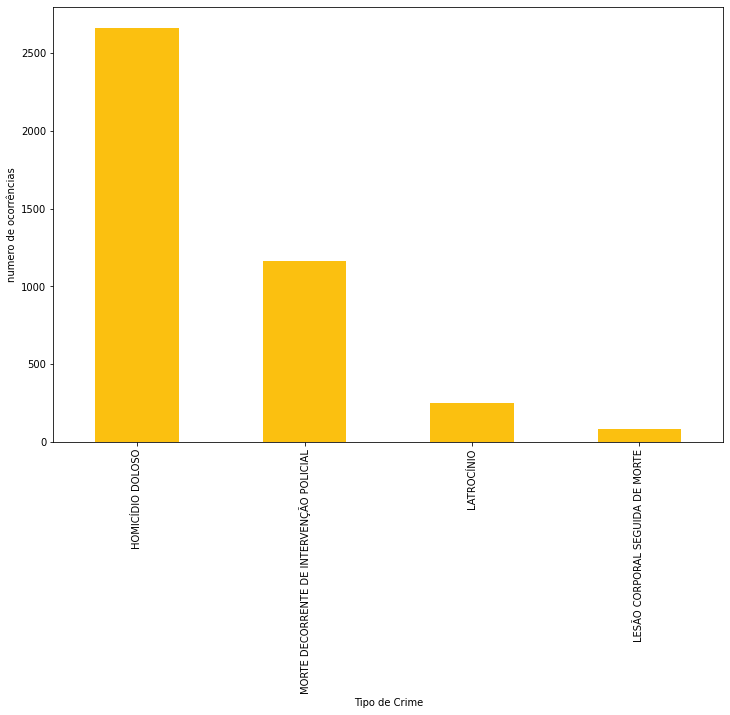

In [138]:
# Insigth 1: Qual o ranking do tipo de crime
case1 = df.groupby(df['tipo_crime']).size().sort_values(ascending=False)
case1.plot.bar(figsize=(12,8),xlabel='Tipo de Crime',
               ylabel='numero de ocorrências', 
               color='#fbc010')

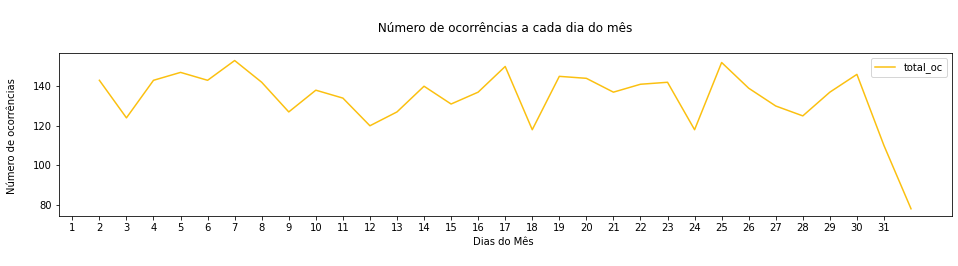

In [139]:
# Insight 2: Qual o número de ocorrências a cada dia do mês?

# Isolando os dados
dias = list(sorted(df['datahora_fato'].dt.day.unique()))
valores_dia = df.groupby(df['datahora_fato'].dt.day).size()

# Criando novo Data Frame
case2 = pd.DataFrame({'dias': dias, 'total_oc' : valores_dia})

# Setando as variáveis
fig, ax = plt.subplots(figsize = (16,3))
case2.plot('dias', 'total_oc', ax = ax, color ='#fbc010')

# Ajustando o gráfico
ax.set_xticks(range(len(case2['dias'])))
ax.set_xticklabels(case2['dias'])
plt.xlabel('Dias do Mês \n')
plt.ylabel('Número de ocorrências \n')
plt.title('\n Número de ocorrências a cada dia do mês \n')

# Plot
plt.show()

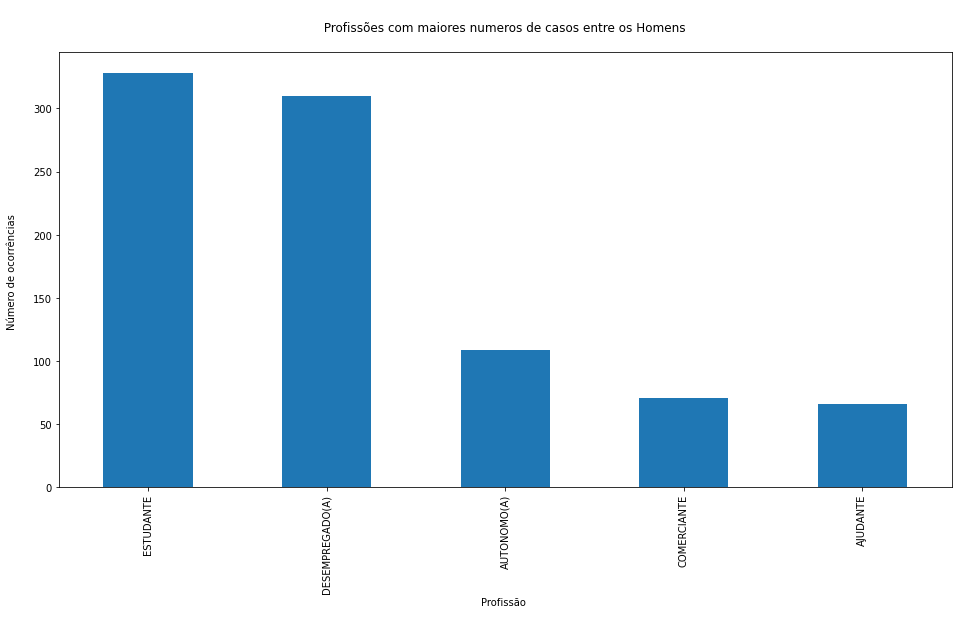

In [140]:
# Insight 3: Qual a profissão dos homens com maior número de ocorrências?

# Separando por sexo Masculino
fthomem = df['sexo_pessoa'] == 'Masculino'
ftnulo = df['profissao'] != 'NAO INFORMADA'
case3 = df.loc[fthomem & ftnulo]

# Criando novo Data Frame
case3 = case3.groupby(case3['profissao']).size().sort_values(ascending=False).head(5)

# Setando as variáveis
fig, ax = plt.subplots(figsize = (16,8))
case3.plot.bar()

# Ajustando o gráfico
plt.xlabel('Profissão \n')
plt.ylabel('Número de ocorrências \n')
plt.title('\n Profissões com maiores numeros de casos entre os Homens \n')

#Plot
plt.show()

In [141]:
df

,tipo_crime,n_vitimas,datahora_fato,periodo_ocorrencia,tipo_pessoa,sexo_pessoa,dt_nasc_pessoa,idade_pessoa,faixa_etaria_pessoa,cor_pele,profissao,cidade,dp_circunscricao,tipo_local_fato,logradouro,n_logradouro,latitude_longitude,corporacao_policial,situacao_policial
0,HOMICÍDIO DOLOSO,1.0,2018-01-06 20:06:00,Noite,Vítima,Masculino,0,NaN,Desconhecido,Não informada,NaN,São Paulo,NaN,Via Pública,AVENIDA PRESIDENTE CASTELO BRANCO,NaN,"-23.523712052,-46.606388286",NaN,NaN
1,HOMICÍDIO DOLOSO,1.0,2018-01-06 19:00:00,Noite,Vítima,Masculino,1973-06-06 00:00:00,44.0,25-44,Branca,CABELEIREIRO(A),São Paulo,NaN,Residência,DA VEDAÇÃO DA DIVULGAÇÃO DOS DADOS RELATIVOS,NaN,NaN,NaN,NaN
2,HOMICÍDIO DOLOSO,1.0,2018-01-18 18:00:00,Noite,Vítima,Feminino,1958-08-02 00:00:00,59.0,45-64,Parda,COMERCIANTE,São Paulo,NaN,Comércio e serviços,RUA DA MOOCA,NaN,"-23.5538998601755,-46.617413203967",NaN,NaN
3,HOMICÍDIO DOLOSO,1.0,2018-01-02 18:48:00,Noite,Vítima,Feminino,2017-09-16 00:00:00,0.0,<18,Branca,NaN,São Paulo,NaN,Residência,DA VEDAÇÃO DA DIVULGAÇÃO DOS DADOS RELATIVOS,NaN,NaN,NaN,NaN
4,HOMICÍDIO DOLOSO,1.0,2018-01-14 15:00:00,Tarde,Vítima,Feminino,0,NaN,Desconhecido,Não informada,NaN,São Paulo,NaN,Via Pública,RUA DOM MARCOS TEIXEIRA,NaN,"-23.5858762097894,-46.5981945475789",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4268,MORTE DECORRENTE DE INTERVENÇÃO POLICIAL,NaN,2021-12-22 01:20:00,Madrugada,Autor/Vítima,Masculino,1993-05-19 00:00:00,28,25-44,Parda,DESEMPREGADO(A),São Paulo,NaN,Via Pública,RUA DINAMARCA,NaN,"-23.4158266352029,-46.7472891521056",Polícia Militar,serviço
4269,MORTE DECORRENTE DE INTERVENÇÃO POLICIAL,NaN,2021-12-27 21:15:00,Noite,Autor/Vítima,Masculino,1989-09-29 00:00:00,32,25-44,Parda,AJUDANTE,São Paulo,NaN,Via Pública,RUA DOS BANQUEIROS,NaN,"-23.5862357639055,-46.5232831894972",Polícia Militar,serviço
4270,MORTE DECORRENTE DE INTERVENÇÃO POLICIAL,NaN,2021-12-29 12:45:00,Tarde,Autor/Vítima,Masculino,0,NaN,Desconhecido,Parda,NaN,São Paulo,NaN,Residência,DA VEDAÇÃO DA DIVULGAÇÃO DOS DADOS RELATIVOS,NaN,NaN,Polícia Militar,serviço
4271,MORTE DECORRENTE DE INTERVENÇÃO POLICIAL,NaN,2021-12-29 23:45:00,Noite,Autor/Vítima,Masculino,0,NaN,Desconhecido,Branca,NaN,São Paulo,NaN,Hospedagem,RUA GENERAL OSORIO,NaN,"-23.5375081569999,-46.641650037",Polícia Militar,serviço
